In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tsfresh

# 获取上一级目录
path = os.path.dirname(os.getcwd())
path

'/home/adt/project/molding'

In [4]:
df_x_train_path = '/wang/train_data_spc19_size_median_base_20201022.csv'
df_x_sub_path = '/wang/sub_data_spc19_size_median_base_20201022.csv'
df_x_ffill_train_path = '/wang/train_data_spc19_size_median_ffill_20201022.csv'
df_x_ffill_sub_path = '/wang/sub_data_spc19_size_median_ffill_20201022.csv'
y_train_path = '/赛题二-初赛/Train/Size.csv'

df_x_train = pd.read_csv(path + df_x_train_path)
df_x_sub = pd.read_csv(path + df_x_sub_path)
df_x_ffill_train = pd.read_csv(path + df_x_ffill_train_path)
df_x_ffill_sub = pd.read_csv(path + df_x_ffill_sub_path)

df_y_train = pd.read_csv(path + y_train_path)

print(df_x_train.shape)
print(df_x_sub.shape)
print(df_x_ffill_train.shape)
print(df_x_ffill_sub.shape)
print(df_y_train.shape)

(16600, 1092)
(3953, 1092)
(16600, 1092)
(3953, 1092)
(16600, 4)


In [5]:
df_x_train

,Id,spcTime,Sensor1_mean,Sensor2_mean,Sensor3_mean,IJ_mean,Sensor5_mean,Sensor6_mean,MouldTemp1_mean,MouldTemp2_mean,...,size2_set_Id_1/4,size2_set_Id_3/4,size2_set_Id_1/100,size2_set_Id_99/100,size3_set_Id_median,size3_set_Id_mean,size3_set_Id_1/4,size3_set_Id_3/4,size3_set_Id_1/100,size3_set_Id_99/100
0,33722,611028906,22.163042,32.812251,31.349038,46.848771,126.786182,128.922971,65.020743,54.700000,...,199.9555,199.99100,199.92000,200.04200,199.987,199.990458,199.974,200.008,199.95178,200.03522
1,34803,611070993,22.435310,34.233380,33.308759,47.759700,125.442534,128.114915,65.016965,55.800000,...,199.9555,199.99100,199.92000,200.04200,199.987,199.990458,199.974,200.008,199.95178,200.03522
2,36621,611138905,19.887190,33.207999,32.743573,46.747051,125.179832,127.701786,65.126615,55.587908,...,199.9555,199.99100,199.92000,200.04200,199.987,199.990458,199.974,200.008,199.95178,200.03522
3,36622,611138942,20.666965,33.001113,31.092858,47.146172,125.208353,127.909088,64.983355,55.590525,...,199.9555,199.99100,199.92000,200.04200,199.987,199.990458,199.974,200.008,199.95178,200.03522
4,36623,611138979,20.149250,32.124987,26.991250,46.600277,125.296491,127.851063,64.993150,55.593598,...,199.9555,199.99100,199.92000,200.04200,199.987,199.990458,199.974,200.008,199.95178,200.03522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16595,150696,617563935,27.477336,5.450004,21.435028,25.913127,124.223685,95.010113,82.494656,38.000000,...,200.0960,200.13125,200.06087,200.17013,200.023,200.022926,200.004,200.041,199.96400,200.08113
16596,150701,617564141,27.630046,5.724087,21.339379,25.915726,124.084781,95.178324,84.505853,37.849650,...,200.0960,200.13125,200.06087,200.17013,200.023,200.022926,200.004,200.041,199.96400,200.08113
16597,150706,617564347,27.412219,5.700744,21.572931,25.796676,124.001156,94.790900,80.213194,38.000000,...,200.0960,200.13125,200.06087,200.17013,200.023,200.022926,200.004,200.041,199.96400,200.08113
16598,150711,617564553,27.176479,5.855807,21.162323,25.769928,123.965279,95.176740,82.776222,38.000000,...,200.0960,200.13125,200.06087,200.17013,200.023,200.022926,200.004,200.041,199.96400,200.08113


In [6]:
df_x_sub

,Id,spcTime,Sensor1_mean,Sensor2_mean,Sensor3_mean,IJ_mean,Sensor5_mean,Sensor6_mean,MouldTemp1_mean,MouldTemp2_mean,...,size2_set_Id_1/4,size2_set_Id_3/4,size2_set_Id_1/100,size2_set_Id_99/100,size3_set_Id_median,size3_set_Id_mean,size3_set_Id_1/4,size3_set_Id_3/4,size3_set_Id_1/100,size3_set_Id_99/100
0,56689,611924900,22.597858,36.804422,33.062633,49.889613,127.170728,130.757344,65.063619,55.004508,...,199.946,199.972,199.91524,200.005,200.005,200.004448,199.994,200.016,199.955,200.045
1,56691,611924975,26.934964,38.640898,33.876881,49.639542,127.253091,130.943582,64.969968,54.948381,...,199.946,199.972,199.91524,200.005,200.005,200.004448,199.994,200.016,199.955,200.045
2,56697,611925201,25.557622,37.700183,36.463039,49.567282,127.262846,130.758587,64.941016,55.031810,...,199.946,199.972,199.91524,200.005,200.005,200.004448,199.994,200.016,199.955,200.045
3,56698,611925238,25.842333,38.524211,34.253905,49.900766,127.351941,130.977658,64.969460,55.000635,...,199.946,199.972,199.91524,200.005,200.005,200.004448,199.994,200.016,199.955,200.045
4,56701,611925351,28.438185,39.999510,35.752628,50.062518,127.489549,130.813072,64.953206,54.992063,...,199.946,199.972,199.91524,200.005,200.005,200.004448,199.994,200.016,199.955,200.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,175911,619290924,26.344983,31.267173,5.106308,25.325568,95.241837,95.622359,86.382743,38.115532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949,175961,619292888,27.666913,31.838032,5.015372,25.032680,95.621631,95.676693,85.344317,38.316638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3950,176111,619298777,38.808530,30.816678,5.059455,24.868879,95.162637,95.164807,86.335012,37.665450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3951,176131,619299562,24.863868,29.735553,5.168297,24.786057,95.460732,95.227920,84.439396,37.206725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_x_ffill_sub

,Id,spcTime,Sensor1_mean,Sensor2_mean,Sensor3_mean,IJ_mean,Sensor5_mean,Sensor6_mean,MouldTemp1_mean,MouldTemp2_mean,...,size2_set_Id_1/4,size2_set_Id_3/4,size2_set_Id_1/100,size2_set_Id_99/100,size3_set_Id_median,size3_set_Id_mean,size3_set_Id_1/4,size3_set_Id_3/4,size3_set_Id_1/100,size3_set_Id_99/100
0,56689,611924900,22.597858,36.804422,33.062633,49.889613,127.170728,130.757344,65.063619,55.004508,...,199.946,199.97200,199.91524,200.00500,200.005,200.004448,199.994,200.016,199.955,200.04500
1,56691,611924975,26.934964,38.640898,33.876881,49.639542,127.253091,130.943582,64.969968,54.948381,...,199.946,199.97200,199.91524,200.00500,200.005,200.004448,199.994,200.016,199.955,200.04500
2,56697,611925201,25.557622,37.700183,36.463039,49.567282,127.262846,130.758587,64.941016,55.031810,...,199.946,199.97200,199.91524,200.00500,200.005,200.004448,199.994,200.016,199.955,200.04500
3,56698,611925238,25.842333,38.524211,34.253905,49.900766,127.351941,130.977658,64.969460,55.000635,...,199.946,199.97200,199.91524,200.00500,200.005,200.004448,199.994,200.016,199.955,200.04500
4,56701,611925351,28.438185,39.999510,35.752628,50.062518,127.489549,130.813072,64.953206,54.992063,...,199.946,199.97200,199.91524,200.00500,200.005,200.004448,199.994,200.016,199.955,200.04500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,175911,619290924,26.344983,31.267173,5.106308,25.325568,95.241837,95.622359,86.382743,38.115532,...,200.096,200.13125,200.06087,200.17013,200.023,200.022926,200.004,200.041,199.964,200.08113
3949,175961,619292888,27.666913,31.838032,5.015372,25.032680,95.621631,95.676693,85.344317,38.316638,...,200.096,200.13125,200.06087,200.17013,200.023,200.022926,200.004,200.041,199.964,200.08113
3950,176111,619298777,38.808530,30.816678,5.059455,24.868879,95.162637,95.164807,86.335012,37.665450,...,200.096,200.13125,200.06087,200.17013,200.023,200.022926,200.004,200.041,199.964,200.08113
3951,176131,619299562,24.863868,29.735553,5.168297,24.786057,95.460732,95.227920,84.439396,37.206725,...,200.096,200.13125,200.06087,200.17013,200.023,200.022926,200.004,200.041,199.964,200.08113


In [9]:
df_y_train

,size1,size2,size3,Id
0,299.998,199.995,199.967,33722
1,299.999,199.938,199.956,34803
2,299.958,199.916,199.947,36621
3,299.974,199.930,199.961,36622
4,299.959,199.915,199.949,36623
...,...,...,...,...
16595,300.141,200.191,200.091,150696
16596,300.150,200.166,200.091,150701
16597,300.137,200.171,200.083,150706
16598,300.148,200.186,200.103,150711


In [10]:
median_col = ['size1_set_Id_median', 'size2_set_Id_median', 'size3_set_Id_median']

base_col = ['MouldTemp11_mean', 'EL_PLST_BP_0', 'MouldTemp13_mean', 'set_Id', 'MouldTemp4_mean',
            'EL_PP_STG_POS_1', 'mdt_sp_0', 'MouldTemp2_mean', 'Sensor1_mean', 'EL_PP_TIME',
            'MouldTemp14_mean', 'EL_PLST_BP_1', 'MouldTemp10_mean', 'Sensor2_mean', 'Sensor8_mean',
            'inj_speed_4', 'EL_IV_END_PRESS', 'ext_mold_temp_flt_3', 'EL_CYC_TIME']


In [13]:
# 构建stacking的框架
from sklearn.model_selection import KFold
from scipy import sparse
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

def stacking_reg(clf, train_x, train_y, test_x, clf_name, kf,
                label_split=None):
    
    # 存放valid集预测的结果，来作为第二层的输入，输出
    train = np.zeros((len(train_x), 1))
    # 存放单折test
    test = np.zeros((len(test_x), 1))
    # 存放K折test
    test_pre = np.empty((folds, len(test_x), 1))
    cv_scores = []
    
    for i, (train_index, 
           test_index) in enumerate(kf.split(train_x, label_split)):
        
        tr_x, tr_y = train_x.values[train_index], train_y.values[train_index]
        te_x, te_y = train_x.values[test_index], train_y.values[test_index]
        print('train.shape:', tr_x.shape)
        print('test.shape:', te_x.shape)
        
        if clf_name in ['rf', 'ada', 'gb', 'et', 'lr', 'cat','lsvc']:
            
            # 因为没有归一化，所以lr不适用，待新建立
            clf.fit(tr_x, tr_y)
            pre = clf.predict(te_x).reshape(-1, 1)
            train[test_index] = pre
            test_pre[i, :] = clf.predict(test_x).reshape(-1,1)
            cv_scores.append(mean_squared_error(te_y, pre))
            
        elif clf_name in ['ridge']:
            
            scaler = RobustScaler().fit(train_x)
            tr_x_scaler = scaler.transform(tr_x)
            te_x_scaler = scaler.transform(te_x)
            test_x_scaler = scaler.transform(test_x)
            
            alph2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
            ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alph2, cv=kf))
            ridge.fit(tr_x_scaler, tr_y)
            
            pre = ridge.predict(te_x_scaler).reshape(-1,1)
            train[test_index] = pre
            test_pre[i, :] = ridge.predict(test_x_scaler).reshape(-1,1)
            cv_scores.append(mean_squared_error(te_y, pre))
            
#         elif clf_name in ['cat']:
                       
#             cat = CatBoostRegressor(iterations=500,
#                                    learning_rate=0.05,
#                                    depth=10,
#                                    eval_metric='RMSE',
#                                    random_seed=2020,
#                                    )
#             cat.fit(tr_x, tr_y,
#                    eval_set=(te_x, te_y),
#                    use_best_model=True,
#                    verbose=50)
            
#             pre = cat.predict(te_x).reshape(-1,1)
#             train[test_index] = pre
#             test_pre[i, :] = cat.predict(test_x).reshape(-1,1)
#             cv_scores.append(mean_squared_error(te_y, pre))
            
        elif clf_name in ['svr']:
            
            scaler = RobustScaler().fit(train_x)
            tr_x_scaler = scaler.transform(tr_x)
            te_x_scaler = scaler.transform(te_x)
            test_x_scaler = scaler.transform(test_x)
            
            svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
            svr.fit(tr_x_scaler, tr_y)
            
            pre = svr.predict(te_x_scaler).reshape(-1,1)
            train[test_index] = pre
            test_pre[i, :] = svr.predict(test_x_scaler).reshape(-1,1)
            cv_scores.append(mean_squared_error(te_y, pre))
   
        elif clf_name in ['xgb']:

            train_matrix = clf.DMatrix(tr_x, label=tr_y, missing=-999)
            test_matrix = clf.DMatrix(te_x, label=te_y, missing=-999)
            z = clf.DMatrix(test_x.values)

            params = {
                'booster': 'gbtree',
                'eval_metric': 'rmse',
                'gamma': 1,
                'min_child_weight': 1.5,
                'max_depth': 5,
                'lambda': 10,
                'subsample': 0.7,
                'colsample': 0.7,
                'colsample_bytree': 0.7,
                'colsample_bylevel': 0.7,
                'eta': 0.03,
                'tree_method': 'exact',
                'seed': 2020,
            }

            num_round = 10000
            early_stopping_rounds = 100
            watchlist = [(train_matrix, 'train'), (test_matrix, 'eval')]
            if test_matrix:
                model = clf.train(
                    params,
                    train_matrix,
                    num_boost_round = num_round,
                    evals = watchlist,
                    early_stopping_rounds = early_stopping_rounds
                )

                pre = model.predict(
                    test_matrix,
                    ntree_limit = model.best_ntree_limit
                ).reshape(-1,1)

                train[test_index] = pre
                test_pre[i,:] = model.predict(
                            z, ntree_limit=model.best_ntree_limit
                ).reshape(-1,1)
                cv_scores.append(mean_squared_error(te_y, pre))
                
            elif clf_name in ['lgb']:
                
                train_matrix = clf.Dataset(tr_x, label=tr_y)
                test_matrix = clf.Dataset(te_x, label=te_y)
                params = {
                    'boosting_type': 'gbdt',
                    'objective': 'regression_l2',
                    'metric': 'mse',
                    'min_child_weight': 1.5,
                    'num_leaves': 2**4-1,
                    'lambda_l2': 10,
                    'subsample': 0.7,
                    'colsample_bytree': 0.7,
                    'colsample_bylevel': 0.7,
                    'learning_rate': 0.05,
                    'tree_method': 'exact',
                    'seed': 2020
                }
                
                num_round = 10000
                early_stopping_rounds = 100
                
                if test_matrix:
                    model = clf.train(
                        params,
                        train_matrix,
                        num_round,
                        valid_sets = test_matrix,
                        early_stopping_rounds = early_stopping_rounds
                    )
                    
                    pre = model.predict(
                        te_x,
                        num_ireration=model.best_iteration
                    ).reshape(-1,1)
                    
                    train[test_index] = pre
                    test_pre[i,:] = model.predict(
                        test_x,
                        num_iterations=model.best_iteration
                    ).reshape(-1,1)
                    
                    cv_scores.append(mean_squared_error(te_y, pre))
                    
            else:
                raise IOError('请加入新的clf name')

        print('%s now score is:' % clf_name, cv_scores)
        
    test[:] = test_pre.mean(axis=0)
    print('%s score_list:'% clf_name, cv_scores)
    print('%s score_mean:'% clf_name, np.mean(cv_scores))
    
    return train.reshape(-1,1), test.reshape(-1,1)




In [14]:
# 构建stacking基学习器


def rf_reg(x_train, y_train, x_valid, kf, label_split=None):
    random_forest = RandomForestRegressor(
        n_estimators=600,
        max_depth=20,
        random_state=2020,
        max_features='auto',
        n_jobs=-1,
        verbose=1
    )
    
    rf_train, rf_test = stacking_reg(random_forest,
                                    x_train,
                                    y_train,
                                    x_valid,
                                    'rf',
                                    kf,
                                    label_split=label_split)
    return rf_train, rf_test, 'rf_reg'

def ada_reg(x_train, y_train, x_valid, kf, label_split=None):
    
    adaboost = AdaBoostRegressor(
        n_estimators=30,
        random_state=2020,
        learning_rate=0.01
    )
    
    ada_train, ada_test = stacking_reg(adaboost,
                                    x_train,
                                    y_train,
                                    x_valid,
                                    'ada',
                                    kf,
                                    label_split=label_split)
    return ada_train, ada_test, 'ada_reg'

def gb_reg(x_train, y_train, x_valid, kf, label_split=None):
    
    gbboost = GradientBoostingRegressor(
        learning_rate=0.04,
        n_estimators=100,
        subsample=0.8,
        random_state=2020,
        max_depth=5,
        verbose=1
    )
    
    gbdt_train, gbdt_test = stacking_reg(gbboost,
                                    x_train,
                                    y_train,
                                    x_valid,
                                    'gb',
                                    kf,
                                    label_split=label_split)
    return gbdt_train, gbdt_test, 'gb_reg'

def et_reg(x_train, y_train, x_valid, kf, label_split=None):
    
    extratree = ExtraTreesRegressor(
        n_estimators=600,
        max_features='auto',
        random_state=2020,
        max_depth=20,
        n_jobs=-1,
        verbose=1
    )
    
    et_train, et_test = stacking_reg(extratree,
                                    x_train,
                                    y_train,
                                    x_valid,
                                    'et',
                                    kf,
                                    label_split=label_split)
    return et_train, et_test, 'et_reg'

def lr_reg(x_train, y_train, x_valid, kf, label_split=None):
    
    lr_reg = LinearRegression(
        
    )
    
    lr_train, lr_test = stacking_reg(lr_reg,
                                    x_train,
                                    y_train,
                                    x_valid,
                                    'lr',
                                    kf,
                                    label_split=label_split)
    return lr_train, lr_test, 'lr_reg'

def ridge_reg(x_train, y_train, x_valid, kf, label_split=None):
    
    ridge_train, ridge_test = stacking_reg(Ridge(),
                                    x_train,
                                    y_train,
                                    x_valid,
                                    'ridge',
                                    kf,
                                    label_split=label_split)
    return ridge_train, ridge_test, 'ridge_reg'

def svr_reg(x_train, y_train, x_valid, kf, label_split=None):
    
    svr_train, svr_test = stacking_reg(SVR(),
                                    x_train,
                                    y_train,
                                    x_valid,
                                    'svr',
                                    kf,
                                    label_split=label_split)
    return svr_train, svr_test, 'svr_reg'

def cat_reg(x_train, y_train, x_valid, kf, label_split=None):
    
    cat = CatBoostRegressor(iterations=500,
                           learning_rate=0.05,
                           depth=10,
                           eval_metric='RMSE',
                           random_seed=2020,
                           )
    
    cat_train, cat_test = stacking_reg(cat,
                                    x_train,
                                    y_train,
                                    x_valid,
                                    'cat',
                                    kf,
                                    label_split=label_split)
    return cat_train, cat_test, 'cat_reg'

def xgb_reg(x_train, y_train, x_valid, kf, label_split=None):
    
    xgb_train, xgb_test = stacking_reg(xgb,
                                    x_train,
                                    y_train,
                                    x_valid,
                                    'xgb',
                                    kf,
                                    label_split=label_split)
    return xgb_train, xgb_test, 'xgb_reg'

def lgb_reg(x_train, y_train, x_valid, kf, label_split=None):
    
    lgb_train, lgb_test = stacking_reg(lgb,
                                    x_train,
                                    y_train,
                                    x_valid,
                                    'lgb',
                                    kf,
                                    label_split=label_split)
    return lgb_train, lgb_test, 'lgb_reg'



In [53]:


def stacking_pred(
    x_train, y_train,
    x_valid, kf,
    clf_list, label_split=None,
    clf_fin='lgb',
    if_concat_origin=True):
    
#     for k, clf_list in enumerate(clf_list):
        
#         clf_list = [clf_list]
#         print('现在第一层的的clf_list', clf_list)
    column_list = []
    train_data_list = []
    test_data_list = []

    for clf in clf_list:
        train_data, test_data, clf_name = clf(
            x_train,
            y_train,
            x_valid,
            kf,
            label_split=label_split)
        train_data_list.append(train_data)
        test_data_list.append(test_data)
        column_list.append('clf_%s'%(clf_name))
            
    train = np.concatenate(train_data_list, axis=1)
    test = np.concatenate(test_data_list, axis=1)
    
    print('*'*100)
    print(test.shape)
    print(test)
    pri_results.append(test)
    print(len(pri_results))
    
    # 将base的特征加入基学习器预测的结果
    if if_concat_origin:
        train = np.concatenate([x_train, train], axis=1)
        test = np.concatenate([x_valid, test], axis=1)

    
    print('base的特征shape是', x_train.shape)
    print('第二层训练的特征 train shape是', train.shape)
    print('第二层训练的特征test shape是', test.shape)
    print(clf_name)
    print(clf_name in ['lgb'])
    
    pre = np.zeros(len(x_valid))
    
    # 在第二层增加kf交替验证，取平均值
    for i, (train_index, val_index) in enumerate(kf.split(train)):
        print("fold {}".format(i))
        X_tr, X_val = train[train_index], train[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
        if clf_fin in ['rf', 'ada', 'gb', 'et', 'lr', 'lsvc', 'knn']:
            if clf_fin in ['rf']:
                clf = RandomForestRegressor(
                    n_estimators = 600,
                    max_depth=20,
                    random_state=2020,
                    verbose=1)
            elif clf_fin in ['ada']:
                clf = AdaBoostRegressor(
                    n_estimators=20,
                    random_state=2020,
                    learning_rate=0.01)
            elif clf_fin in ['gb']:
                clf = GradientBoostingRegressor(
                    n_estimators=100,
                    subsample=0.8,
                    max_depth=5,
                    random_state=2020,
                    learning_rate=0.04,
                    verbose=1)
            elif clf_fin in ['et']:
                clf = ExtraTreeRegressor(
                    n_estimators=600,
                    max_depth=35,
                    max_features='auto',
                    random_state=2020,
                    verbose=1)
            elif clf_fin in ['lr']:
                clf = LinearRegression(
                    )

            clf.fit(X_tr, y_tr)
            pre += clf.predict(test).reshape(-1,1)/folds
#     return pre

        elif clf_fin in ['xgb']:
            clf = xgb
            train_matrix = clf.DMatrix(X_tr, 
                                      label=y_tr, missing=-999)
            # 这里还用train用来进行训练时的eval评价
            test_matrix = clf.DMatrix(X_val,
                                     label=y_val, missing=-999)
            params = {
                'booster': 'gbtree',
                'eval_metric': 'rmse',
                'gamma': 1,
                'min_child_weight': 1.5,
                'max_depth': 5,
                'lambda': 10,
                'subsample': 0.7,
                'colsample_bytree': 0.7,
                'colsample_bylevel': 0.7,
                'eta': 0.03,
                'tree_method': 'exact',
                'seed': 2020
            }

            num_round = 10000
            early_stopping_rounds = 100
            watchlist = [(train_matrix, 'train'), (test_matrix, 'eval')]

            model = clf.train(
                params,
                train_matrix,
                num_boost_round = num_round,
                evals = watchlist,
                early_stopping_rounds = early_stopping_rounds
            )

            pre += model.predict(
                test,
                ntree_limit = model.best_ntree_limit
            ).reshape(-1,1)/folds

#     return pre

        elif clf_fin in ['lgb']:
            clf = lgb
            train_matrix = clf.Dataset(X_tr, 
                                      label=y_tr)
            # 这里还用train用来进行训练时的eval评价
            test_matrix = clf.Dataset(X_val,
                                     label=y_val)
            params = {
                'boosting_type': 'gbdt',
                'objective': 'regression',
    #             'metric': 'mse',
    #             'min_child_weight': 1.5,
                'num_leaves': 2**4-1,
    #             'lambda_l2': 10,
                'subsample': 0.9,
    #             'colsample_bytree': 0.7,
    #             'colsample_bylevel': 0.7,
                'learning_rate': 0.05,
    #             'tree_method': 'exact',
                'seed': 2020
            }

            num_round = 2000
            early_stopping_rounds = 50

            model = clf.train(
                params,
                train_matrix,
                num_round,
                valid_sets = test_matrix,
                verbose_eval=50,
                early_stopping_rounds = early_stopping_rounds
            )


            print('==============================================')
            
            pre += (model.predict(
                test,
                num_iteration=model.best_iteration
            ))/folds
            print(pre)
                
    return pre



In [29]:
folds = 5
seed = 1
kf = KFold(n_splits=folds, shuffle=True, random_state=0)
# clf_list = [ridge_reg, rf_reg, ada_reg, et_reg, xgb_reg]


In [20]:
size_dic = {
    'size1': base_col+['size1_set_Id_median'],
    'size2': base_col,
    'size3': base_col+['size3_set_Id_median']
}

size_dic['size1']

['MouldTemp11_mean',
 'EL_PLST_BP_0',
 'MouldTemp13_mean',
 'set_Id',
 'MouldTemp4_mean',
 'EL_PP_STG_POS_1',
 'mdt_sp_0',
 'MouldTemp2_mean',
 'Sensor1_mean',
 'EL_PP_TIME',
 'MouldTemp14_mean',
 'EL_PLST_BP_1',
 'MouldTemp10_mean',
 'Sensor2_mean',
 'Sensor8_mean',
 'inj_speed_4',
 'EL_IV_END_PRESS',
 'ext_mold_temp_flt_3',
 'EL_CYC_TIME',
 'size1_set_Id_median']

In [32]:
len(clf_list)

2

In [57]:
sub=pd.read_csv(path + '/赛题二-初赛/sub_file.csv')
pri_results = []
clf_list = [cat_reg, rf_reg, ada_reg, et_reg, xgb_reg, lgb_reg]
# clf_list = [et_reg, ada_reg]

for i in ['size1', 'size2', 'size3']:
    print(i)
    pred = stacking_pred(df_x_ffill_train[size_dic[i]],
                        df_y_train[i],
                        df_x_ffill_sub[size_dic[i]],
                        kf,
                        clf_list,
                        label_split=None,
                        clf_fin='lgb',
                        if_concat_origin=True)
    sub[i] = pred


size1
train.shape: (13280, 20)
test.shape: (3320, 20)
0:	learn: 0.0402632	total: 24.9ms	remaining: 12.4s
1:	learn: 0.0390661	total: 48.5ms	remaining: 12.1s
2:	learn: 0.0379508	total: 64.2ms	remaining: 10.6s
3:	learn: 0.0369282	total: 81.7ms	remaining: 10.1s
4:	learn: 0.0359734	total: 86.9ms	remaining: 8.6s
5:	learn: 0.0350314	total: 99.4ms	remaining: 8.19s
6:	learn: 0.0341677	total: 107ms	remaining: 7.53s
7:	learn: 0.0333471	total: 120ms	remaining: 7.37s
8:	learn: 0.0325737	total: 134ms	remaining: 7.31s
9:	learn: 0.0318475	total: 147ms	remaining: 7.2s
10:	learn: 0.0311679	total: 160ms	remaining: 7.1s
11:	learn: 0.0305498	total: 172ms	remaining: 7s
12:	learn: 0.0299489	total: 185ms	remaining: 6.93s
13:	learn: 0.0293556	total: 198ms	remaining: 6.86s
14:	learn: 0.0288215	total: 210ms	remaining: 6.79s
15:	learn: 0.0283430	total: 223ms	remaining: 6.73s
16:	learn: 0.0278695	total: 235ms	remaining: 6.68s
17:	learn: 0.0274358	total: 248ms	remaining: 6.63s
18:	learn: 0.0270409	total: 260ms	rema

162:	learn: 0.0194461	total: 2.2s	remaining: 4.55s
163:	learn: 0.0194241	total: 2.23s	remaining: 4.56s
164:	learn: 0.0194104	total: 2.25s	remaining: 4.57s
165:	learn: 0.0193964	total: 2.27s	remaining: 4.57s
166:	learn: 0.0193859	total: 2.29s	remaining: 4.56s
167:	learn: 0.0193693	total: 2.3s	remaining: 4.55s
168:	learn: 0.0193452	total: 2.31s	remaining: 4.53s
169:	learn: 0.0193248	total: 2.33s	remaining: 4.51s
170:	learn: 0.0193096	total: 2.34s	remaining: 4.5s
171:	learn: 0.0192984	total: 2.35s	remaining: 4.48s
172:	learn: 0.0192888	total: 2.36s	remaining: 4.47s
173:	learn: 0.0192742	total: 2.38s	remaining: 4.45s
174:	learn: 0.0192594	total: 2.39s	remaining: 4.44s
175:	learn: 0.0192435	total: 2.4s	remaining: 4.42s
176:	learn: 0.0192357	total: 2.41s	remaining: 4.41s
177:	learn: 0.0192109	total: 2.43s	remaining: 4.39s
178:	learn: 0.0192020	total: 2.44s	remaining: 4.38s
179:	learn: 0.0191924	total: 2.45s	remaining: 4.36s
180:	learn: 0.0191749	total: 2.46s	remaining: 4.35s
181:	learn: 0.01

326:	learn: 0.0172505	total: 4.45s	remaining: 2.36s
327:	learn: 0.0172410	total: 4.47s	remaining: 2.35s
328:	learn: 0.0172323	total: 4.49s	remaining: 2.33s
329:	learn: 0.0172164	total: 4.5s	remaining: 2.32s
330:	learn: 0.0172023	total: 4.52s	remaining: 2.31s
331:	learn: 0.0171828	total: 4.53s	remaining: 2.29s
332:	learn: 0.0171747	total: 4.54s	remaining: 2.28s
333:	learn: 0.0171633	total: 4.56s	remaining: 2.26s
334:	learn: 0.0171547	total: 4.57s	remaining: 2.25s
335:	learn: 0.0171249	total: 4.58s	remaining: 2.24s
336:	learn: 0.0171134	total: 4.59s	remaining: 2.22s
337:	learn: 0.0171013	total: 4.61s	remaining: 2.21s
338:	learn: 0.0170950	total: 4.62s	remaining: 2.19s
339:	learn: 0.0170831	total: 4.64s	remaining: 2.18s
340:	learn: 0.0170720	total: 4.65s	remaining: 2.17s
341:	learn: 0.0170622	total: 4.66s	remaining: 2.15s
342:	learn: 0.0170531	total: 4.67s	remaining: 2.14s
343:	learn: 0.0170402	total: 4.69s	remaining: 2.13s
344:	learn: 0.0170325	total: 4.7s	remaining: 2.11s
345:	learn: 0.

489:	learn: 0.0153295	total: 6.7s	remaining: 137ms
490:	learn: 0.0153099	total: 6.71s	remaining: 123ms
491:	learn: 0.0152998	total: 6.73s	remaining: 109ms
492:	learn: 0.0152917	total: 6.75s	remaining: 95.9ms
493:	learn: 0.0152847	total: 6.77s	remaining: 82.2ms
494:	learn: 0.0152781	total: 6.78s	remaining: 68.5ms
495:	learn: 0.0152639	total: 6.79s	remaining: 54.8ms
496:	learn: 0.0152566	total: 6.81s	remaining: 41.1ms
497:	learn: 0.0152520	total: 6.82s	remaining: 27.4ms
498:	learn: 0.0152361	total: 6.83s	remaining: 13.7ms
499:	learn: 0.0152120	total: 6.85s	remaining: 0us
cat now score is: [0.00039148996198966167]
train.shape: (13280, 20)
test.shape: (3320, 20)
0:	learn: 0.0403331	total: 18.1ms	remaining: 9.02s
1:	learn: 0.0391257	total: 31.2ms	remaining: 7.77s
2:	learn: 0.0379731	total: 38.4ms	remaining: 6.36s
3:	learn: 0.0369562	total: 50.8ms	remaining: 6.3s
4:	learn: 0.0359968	total: 55.8ms	remaining: 5.52s
5:	learn: 0.0350644	total: 68.2ms	remaining: 5.62s
6:	learn: 0.0341957	total: 7

149:	learn: 0.0195750	total: 2s	remaining: 4.67s
150:	learn: 0.0195573	total: 2.01s	remaining: 4.65s
151:	learn: 0.0195415	total: 2.02s	remaining: 4.64s
152:	learn: 0.0195216	total: 2.04s	remaining: 4.62s
153:	learn: 0.0195095	total: 2.05s	remaining: 4.61s
154:	learn: 0.0194926	total: 2.06s	remaining: 4.59s
155:	learn: 0.0194849	total: 2.08s	remaining: 4.58s
156:	learn: 0.0194751	total: 2.09s	remaining: 4.56s
157:	learn: 0.0194617	total: 2.1s	remaining: 4.55s
158:	learn: 0.0194460	total: 2.11s	remaining: 4.53s
159:	learn: 0.0194360	total: 2.13s	remaining: 4.52s
160:	learn: 0.0194120	total: 2.14s	remaining: 4.5s
161:	learn: 0.0193997	total: 2.15s	remaining: 4.49s
162:	learn: 0.0193873	total: 2.16s	remaining: 4.47s
163:	learn: 0.0193699	total: 2.18s	remaining: 4.46s
164:	learn: 0.0193561	total: 2.19s	remaining: 4.45s
165:	learn: 0.0193468	total: 2.2s	remaining: 4.43s
166:	learn: 0.0193310	total: 2.22s	remaining: 4.42s
167:	learn: 0.0193115	total: 2.23s	remaining: 4.41s
168:	learn: 0.0192

308:	learn: 0.0174740	total: 4.22s	remaining: 2.61s
309:	learn: 0.0174560	total: 4.23s	remaining: 2.59s
310:	learn: 0.0174376	total: 4.25s	remaining: 2.58s
311:	learn: 0.0174241	total: 4.26s	remaining: 2.57s
312:	learn: 0.0174136	total: 4.27s	remaining: 2.55s
313:	learn: 0.0173991	total: 4.28s	remaining: 2.54s
314:	learn: 0.0173917	total: 4.3s	remaining: 2.52s
315:	learn: 0.0173733	total: 4.31s	remaining: 2.51s
316:	learn: 0.0173628	total: 4.32s	remaining: 2.5s
317:	learn: 0.0173471	total: 4.34s	remaining: 2.48s
318:	learn: 0.0173405	total: 4.35s	remaining: 2.47s
319:	learn: 0.0173331	total: 4.36s	remaining: 2.45s
320:	learn: 0.0173237	total: 4.38s	remaining: 2.44s
321:	learn: 0.0173162	total: 4.39s	remaining: 2.42s
322:	learn: 0.0172962	total: 4.4s	remaining: 2.41s
323:	learn: 0.0172852	total: 4.41s	remaining: 2.4s
324:	learn: 0.0172711	total: 4.43s	remaining: 2.38s
325:	learn: 0.0172650	total: 4.44s	remaining: 2.37s
326:	learn: 0.0172520	total: 4.45s	remaining: 2.36s
327:	learn: 0.01

473:	learn: 0.0154950	total: 6.48s	remaining: 356ms
474:	learn: 0.0154856	total: 6.5s	remaining: 342ms
475:	learn: 0.0154800	total: 6.51s	remaining: 328ms
476:	learn: 0.0154724	total: 6.52s	remaining: 315ms
477:	learn: 0.0154649	total: 6.54s	remaining: 301ms
478:	learn: 0.0154557	total: 6.55s	remaining: 287ms
479:	learn: 0.0154423	total: 6.56s	remaining: 273ms
480:	learn: 0.0154370	total: 6.57s	remaining: 260ms
481:	learn: 0.0154304	total: 6.59s	remaining: 246ms
482:	learn: 0.0154260	total: 6.6s	remaining: 232ms
483:	learn: 0.0154097	total: 6.61s	remaining: 219ms
484:	learn: 0.0154015	total: 6.62s	remaining: 205ms
485:	learn: 0.0153819	total: 6.64s	remaining: 191ms
486:	learn: 0.0153662	total: 6.65s	remaining: 178ms
487:	learn: 0.0153477	total: 6.66s	remaining: 164ms
488:	learn: 0.0153364	total: 6.68s	remaining: 150ms
489:	learn: 0.0153267	total: 6.69s	remaining: 137ms
490:	learn: 0.0153138	total: 6.7s	remaining: 123ms
491:	learn: 0.0153006	total: 6.72s	remaining: 109ms
492:	learn: 0.0

131:	learn: 0.0198362	total: 1.79s	remaining: 4.99s
132:	learn: 0.0198267	total: 1.8s	remaining: 4.97s
133:	learn: 0.0198175	total: 1.81s	remaining: 4.96s
134:	learn: 0.0198083	total: 1.83s	remaining: 4.94s
135:	learn: 0.0197948	total: 1.84s	remaining: 4.92s
136:	learn: 0.0197746	total: 1.85s	remaining: 4.91s
137:	learn: 0.0197570	total: 1.86s	remaining: 4.89s
138:	learn: 0.0197400	total: 1.88s	remaining: 4.88s
139:	learn: 0.0197241	total: 1.89s	remaining: 4.86s
140:	learn: 0.0197122	total: 1.9s	remaining: 4.85s
141:	learn: 0.0196966	total: 1.92s	remaining: 4.83s
142:	learn: 0.0196862	total: 1.93s	remaining: 4.81s
143:	learn: 0.0196707	total: 1.94s	remaining: 4.8s
144:	learn: 0.0196578	total: 1.96s	remaining: 4.81s
145:	learn: 0.0196433	total: 1.98s	remaining: 4.8s
146:	learn: 0.0196297	total: 1.99s	remaining: 4.79s
147:	learn: 0.0196041	total: 2.01s	remaining: 4.77s
148:	learn: 0.0195897	total: 2.02s	remaining: 4.76s
149:	learn: 0.0195755	total: 2.03s	remaining: 4.74s
150:	learn: 0.01

296:	learn: 0.0175512	total: 4.05s	remaining: 2.77s
297:	learn: 0.0175327	total: 4.07s	remaining: 2.76s
298:	learn: 0.0175194	total: 4.08s	remaining: 2.74s
299:	learn: 0.0174996	total: 4.09s	remaining: 2.73s
300:	learn: 0.0174883	total: 4.11s	remaining: 2.71s
301:	learn: 0.0174714	total: 4.12s	remaining: 2.7s
302:	learn: 0.0174592	total: 4.13s	remaining: 2.69s
303:	learn: 0.0174444	total: 4.14s	remaining: 2.67s
304:	learn: 0.0174379	total: 4.16s	remaining: 2.66s
305:	learn: 0.0174262	total: 4.17s	remaining: 2.64s
306:	learn: 0.0174135	total: 4.18s	remaining: 2.63s
307:	learn: 0.0174051	total: 4.19s	remaining: 2.61s
308:	learn: 0.0173972	total: 4.21s	remaining: 2.6s
309:	learn: 0.0173786	total: 4.22s	remaining: 2.59s
310:	learn: 0.0173713	total: 4.23s	remaining: 2.57s
311:	learn: 0.0173590	total: 4.25s	remaining: 2.56s
312:	learn: 0.0173477	total: 4.26s	remaining: 2.54s
313:	learn: 0.0173339	total: 4.27s	remaining: 2.53s
314:	learn: 0.0173238	total: 4.29s	remaining: 2.52s
315:	learn: 0.

462:	learn: 0.0155820	total: 6.32s	remaining: 505ms
463:	learn: 0.0155663	total: 6.34s	remaining: 492ms
464:	learn: 0.0155510	total: 6.35s	remaining: 478ms
465:	learn: 0.0155243	total: 6.36s	remaining: 464ms
466:	learn: 0.0155173	total: 6.38s	remaining: 451ms
467:	learn: 0.0155128	total: 6.39s	remaining: 437ms
468:	learn: 0.0155041	total: 6.4s	remaining: 423ms
469:	learn: 0.0154984	total: 6.42s	remaining: 409ms
470:	learn: 0.0154878	total: 6.43s	remaining: 396ms
471:	learn: 0.0154818	total: 6.44s	remaining: 382ms
472:	learn: 0.0154733	total: 6.45s	remaining: 368ms
473:	learn: 0.0154608	total: 6.47s	remaining: 355ms
474:	learn: 0.0154557	total: 6.48s	remaining: 341ms
475:	learn: 0.0154495	total: 6.49s	remaining: 327ms
476:	learn: 0.0154426	total: 6.5s	remaining: 314ms
477:	learn: 0.0154336	total: 6.52s	remaining: 300ms
478:	learn: 0.0154253	total: 6.53s	remaining: 286ms
479:	learn: 0.0153963	total: 6.54s	remaining: 273ms
480:	learn: 0.0153789	total: 6.56s	remaining: 259ms
481:	learn: 0.

121:	learn: 0.0194778	total: 1.67s	remaining: 5.17s
122:	learn: 0.0194682	total: 1.68s	remaining: 5.15s
123:	learn: 0.0194580	total: 1.69s	remaining: 5.13s
124:	learn: 0.0194475	total: 1.71s	remaining: 5.12s
125:	learn: 0.0194369	total: 1.72s	remaining: 5.11s
126:	learn: 0.0194265	total: 1.73s	remaining: 5.09s
127:	learn: 0.0194144	total: 1.75s	remaining: 5.07s
128:	learn: 0.0193898	total: 1.76s	remaining: 5.06s
129:	learn: 0.0193801	total: 1.77s	remaining: 5.04s
130:	learn: 0.0193635	total: 1.78s	remaining: 5.03s
131:	learn: 0.0193515	total: 1.8s	remaining: 5.01s
132:	learn: 0.0193299	total: 1.81s	remaining: 5s
133:	learn: 0.0193207	total: 1.82s	remaining: 4.98s
134:	learn: 0.0193084	total: 1.84s	remaining: 4.96s
135:	learn: 0.0192937	total: 1.85s	remaining: 4.95s
136:	learn: 0.0192857	total: 1.86s	remaining: 4.93s
137:	learn: 0.0192744	total: 1.88s	remaining: 4.92s
138:	learn: 0.0192586	total: 1.89s	remaining: 4.9s
139:	learn: 0.0192394	total: 1.9s	remaining: 4.89s
140:	learn: 0.0192

284:	learn: 0.0173343	total: 3.95s	remaining: 2.98s
285:	learn: 0.0173107	total: 3.96s	remaining: 2.96s
286:	learn: 0.0172881	total: 3.97s	remaining: 2.95s
287:	learn: 0.0172654	total: 3.98s	remaining: 2.93s
288:	learn: 0.0172589	total: 4s	remaining: 2.92s
289:	learn: 0.0172488	total: 4.01s	remaining: 2.9s
290:	learn: 0.0172387	total: 4.02s	remaining: 2.89s
291:	learn: 0.0172182	total: 4.04s	remaining: 2.88s
292:	learn: 0.0172000	total: 4.05s	remaining: 2.86s
293:	learn: 0.0171853	total: 4.06s	remaining: 2.85s
294:	learn: 0.0171735	total: 4.08s	remaining: 2.83s
295:	learn: 0.0171661	total: 4.09s	remaining: 2.82s
296:	learn: 0.0171517	total: 4.1s	remaining: 2.8s
297:	learn: 0.0171454	total: 4.11s	remaining: 2.79s
298:	learn: 0.0171319	total: 4.13s	remaining: 2.77s
299:	learn: 0.0171221	total: 4.14s	remaining: 2.76s
300:	learn: 0.0171067	total: 4.16s	remaining: 2.75s
301:	learn: 0.0170932	total: 4.18s	remaining: 2.74s
302:	learn: 0.0170839	total: 4.2s	remaining: 2.73s
303:	learn: 0.01707

447:	learn: 0.0154230	total: 6.21s	remaining: 720ms
448:	learn: 0.0154056	total: 6.23s	remaining: 707ms
449:	learn: 0.0153915	total: 6.24s	remaining: 693ms
450:	learn: 0.0153809	total: 6.25s	remaining: 679ms
451:	learn: 0.0153661	total: 6.26s	remaining: 665ms
452:	learn: 0.0153567	total: 6.28s	remaining: 651ms
453:	learn: 0.0153466	total: 6.29s	remaining: 637ms
454:	learn: 0.0153302	total: 6.3s	remaining: 623ms
455:	learn: 0.0153248	total: 6.32s	remaining: 609ms
456:	learn: 0.0153146	total: 6.33s	remaining: 595ms
457:	learn: 0.0153074	total: 6.34s	remaining: 582ms
458:	learn: 0.0152948	total: 6.35s	remaining: 568ms
459:	learn: 0.0152863	total: 6.37s	remaining: 554ms
460:	learn: 0.0152775	total: 6.38s	remaining: 540ms
461:	learn: 0.0152670	total: 6.39s	remaining: 526ms
462:	learn: 0.0152561	total: 6.41s	remaining: 512ms
463:	learn: 0.0152370	total: 6.42s	remaining: 498ms
464:	learn: 0.0152310	total: 6.43s	remaining: 484ms
465:	learn: 0.0152220	total: 6.44s	remaining: 470ms
466:	learn: 0

120:	learn: 0.0198378	total: 1.59s	remaining: 4.99s
121:	learn: 0.0198221	total: 1.6s	remaining: 4.97s
122:	learn: 0.0198052	total: 1.62s	remaining: 4.96s
123:	learn: 0.0197937	total: 1.63s	remaining: 4.94s
124:	learn: 0.0197737	total: 1.64s	remaining: 4.93s
125:	learn: 0.0197577	total: 1.65s	remaining: 4.91s
126:	learn: 0.0197383	total: 1.67s	remaining: 4.9s
127:	learn: 0.0197158	total: 1.68s	remaining: 4.88s
128:	learn: 0.0197045	total: 1.69s	remaining: 4.87s
129:	learn: 0.0196919	total: 1.71s	remaining: 4.86s
130:	learn: 0.0196769	total: 1.72s	remaining: 4.84s
131:	learn: 0.0196568	total: 1.73s	remaining: 4.83s
132:	learn: 0.0196372	total: 1.74s	remaining: 4.81s
133:	learn: 0.0196230	total: 1.76s	remaining: 4.8s
134:	learn: 0.0196067	total: 1.78s	remaining: 4.81s
135:	learn: 0.0195949	total: 1.8s	remaining: 4.82s
136:	learn: 0.0195882	total: 1.82s	remaining: 4.83s
137:	learn: 0.0195780	total: 1.84s	remaining: 4.84s
138:	learn: 0.0195608	total: 1.86s	remaining: 4.84s
139:	learn: 0.01

286:	learn: 0.0177143	total: 3.86s	remaining: 2.87s
287:	learn: 0.0177047	total: 3.88s	remaining: 2.85s
288:	learn: 0.0176978	total: 3.89s	remaining: 2.84s
289:	learn: 0.0176835	total: 3.91s	remaining: 2.83s
290:	learn: 0.0176714	total: 3.92s	remaining: 2.81s
291:	learn: 0.0176514	total: 3.93s	remaining: 2.8s
292:	learn: 0.0176361	total: 3.94s	remaining: 2.79s
293:	learn: 0.0176308	total: 3.96s	remaining: 2.77s
294:	learn: 0.0176225	total: 3.97s	remaining: 2.76s
295:	learn: 0.0176155	total: 4s	remaining: 2.75s
296:	learn: 0.0176029	total: 4.02s	remaining: 2.75s
297:	learn: 0.0175944	total: 4.04s	remaining: 2.74s
298:	learn: 0.0175763	total: 4.07s	remaining: 2.73s
299:	learn: 0.0175658	total: 4.09s	remaining: 2.73s
300:	learn: 0.0175563	total: 4.1s	remaining: 2.71s
301:	learn: 0.0175524	total: 4.11s	remaining: 2.7s
302:	learn: 0.0175464	total: 4.13s	remaining: 2.68s
303:	learn: 0.0175382	total: 4.14s	remaining: 2.67s
304:	learn: 0.0175296	total: 4.15s	remaining: 2.65s
305:	learn: 0.0175

450:	learn: 0.0157992	total: 6.13s	remaining: 666ms
451:	learn: 0.0157913	total: 6.14s	remaining: 652ms
452:	learn: 0.0157832	total: 6.15s	remaining: 639ms
453:	learn: 0.0157692	total: 6.17s	remaining: 625ms
454:	learn: 0.0157633	total: 6.19s	remaining: 613ms
455:	learn: 0.0157440	total: 6.22s	remaining: 600ms
456:	learn: 0.0157385	total: 6.24s	remaining: 587ms
457:	learn: 0.0157260	total: 6.27s	remaining: 575ms
458:	learn: 0.0156973	total: 6.29s	remaining: 562ms
459:	learn: 0.0156745	total: 6.3s	remaining: 548ms
460:	learn: 0.0156680	total: 6.31s	remaining: 534ms
461:	learn: 0.0156606	total: 6.33s	remaining: 520ms
462:	learn: 0.0156507	total: 6.34s	remaining: 507ms
463:	learn: 0.0156457	total: 6.35s	remaining: 493ms
464:	learn: 0.0156257	total: 6.37s	remaining: 479ms
465:	learn: 0.0156198	total: 6.38s	remaining: 465ms
466:	learn: 0.0156139	total: 6.39s	remaining: 452ms
467:	learn: 0.0156072	total: 6.4s	remaining: 438ms
468:	learn: 0.0155917	total: 6.42s	remaining: 424ms
469:	learn: 0.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   12.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.00038134620853567616]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.00038134620853567616, 0.0003754341564156086]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.00038134620853567616, 0.0003754341564156086, 0.0003935211822464129]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   12.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.00038134620853567616, 0.0003754341564156086, 0.0003935211822464129, 0.0004841389625783266]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.00038134620853567616, 0.0003754341564156086, 0.0003935211822464129, 0.0004841389625783266, 0.00040692793612459675]
rf score_list: [0.00038134620853567616, 0.0003754341564156086, 0.0003935211822464129, 0.0004841389625783266, 0.00040692793612459675]
rf score_mean: 0.0004082736891801242
train.shape: (13280, 20)
test.shape: (3320, 20)
ada now score is: [0.0006816450145140596]
train.shape: (13280, 20)
test.shape: (3320, 20)
ada now score is: [0.0006816450145140596, 0.0006798092648410558]
train.shape: (13280, 20)
test.shape: (3320, 20)
ada now score is: [0.0006816450145140596, 0.0006798092648410558, 0.0006975903711611913]
train.shape: (13280, 20)
test.shape: (3320, 20)
ada now score is: [0.0006816450145140596, 0.0006798092648410558, 0.0006975903711611913, 0.0007987980923688107]
train.shape: (13280, 20)
test.shape: (3320, 20)
ada now score is: [0.0006816450145140596, 0.0006798092648410558, 0.0006975903711611913, 0.0007987980923688107, 0.0007269815736278618]
ada score_list:

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

et now score is: [0.00037122102530462003]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

et now score is: [0.00037122102530462003, 0.00036166067637594703]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

et now score is: [0.00037122102530462003, 0.00036166067637594703, 0.0003722241471836619]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

et now score is: [0.00037122102530462003, 0.00036166067637594703, 0.0003722241471836619, 0.00048188845387758393]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s


et now score is: [0.00037122102530462003, 0.00036166067637594703, 0.0003722241471836619, 0.00048188845387758393, 0.0003965908248737411]
et score_list: [0.00037122102530462003, 0.00036166067637594703, 0.0003722241471836619, 0.00048188845387758393, 0.0003965908248737411]
et score_mean: 0.0003967170255231108
train.shape: (13280, 20)
test.shape: (3320, 20)
[19:51:24] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:290.58807	eval-rmse:290.58896
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 100 rounds.
[1]	train-rmse:281.87979	eval-rmse:281.88068
[2]	train-rmse:273.43246	eval-rmse:273.43338
[3]	train-rmse:265.23831	eval

[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished


[33]	train-rmse:106.46855	eval-rmse:106.46947
[34]	train-rmse:103.27794	eval-rmse:103.27885
[35]	train-rmse:100.18284	eval-rmse:100.18378
[36]	train-rmse:97.18062	eval-rmse:97.18153
[37]	train-rmse:94.26837	eval-rmse:94.26929
[38]	train-rmse:91.44340	eval-rmse:91.44432
[39]	train-rmse:88.70305	eval-rmse:88.70396
[40]	train-rmse:86.04476	eval-rmse:86.04570
[41]	train-rmse:83.46616	eval-rmse:83.46712
[42]	train-rmse:80.96491	eval-rmse:80.96584
[43]	train-rmse:78.53857	eval-rmse:78.53949
[44]	train-rmse:76.18491	eval-rmse:76.18584
[45]	train-rmse:73.90179	eval-rmse:73.90270
[46]	train-rmse:71.68713	eval-rmse:71.68805
[47]	train-rmse:69.53886	eval-rmse:69.53976
[48]	train-rmse:67.45491	eval-rmse:67.45583
[49]	train-rmse:65.43343	eval-rmse:65.43436
[50]	train-rmse:63.47252	eval-rmse:63.47343
[51]	train-rmse:61.57040	eval-rmse:61.57132
[52]	train-rmse:59.72528	eval-rmse:59.72620
[53]	train-rmse:57.93543	eval-rmse:57.93636
[54]	train-rmse:56.19925	eval-rmse:56.20016
[55]	train-rmse:54.51508	e

[222]	train-rmse:0.34096	eval-rmse:0.34192
[223]	train-rmse:0.33087	eval-rmse:0.33181
[224]	train-rmse:0.32108	eval-rmse:0.32201
[225]	train-rmse:0.31157	eval-rmse:0.31249
[226]	train-rmse:0.30234	eval-rmse:0.30323
[227]	train-rmse:0.29344	eval-rmse:0.29434
[228]	train-rmse:0.28475	eval-rmse:0.28565
[229]	train-rmse:0.27637	eval-rmse:0.27727
[230]	train-rmse:0.26822	eval-rmse:0.26913
[231]	train-rmse:0.26032	eval-rmse:0.26121
[232]	train-rmse:0.25266	eval-rmse:0.25353
[233]	train-rmse:0.24521	eval-rmse:0.24610
[234]	train-rmse:0.23801	eval-rmse:0.23890
[235]	train-rmse:0.23105	eval-rmse:0.23194
[236]	train-rmse:0.22427	eval-rmse:0.22514
[237]	train-rmse:0.21770	eval-rmse:0.21857
[238]	train-rmse:0.21133	eval-rmse:0.21218
[239]	train-rmse:0.20516	eval-rmse:0.20600
[240]	train-rmse:0.19917	eval-rmse:0.20002
[241]	train-rmse:0.19337	eval-rmse:0.19422
[242]	train-rmse:0.18774	eval-rmse:0.18860
[243]	train-rmse:0.18232	eval-rmse:0.18318
[244]	train-rmse:0.17706	eval-rmse:0.17791
[245]	train

[413]	train-rmse:0.03185	eval-rmse:0.03174
[414]	train-rmse:0.03184	eval-rmse:0.03174
[415]	train-rmse:0.03184	eval-rmse:0.03174
[416]	train-rmse:0.03184	eval-rmse:0.03173
[417]	train-rmse:0.03184	eval-rmse:0.03173
[418]	train-rmse:0.03184	eval-rmse:0.03173
[419]	train-rmse:0.03184	eval-rmse:0.03173
[420]	train-rmse:0.03184	eval-rmse:0.03173
[421]	train-rmse:0.03184	eval-rmse:0.03173
[422]	train-rmse:0.03184	eval-rmse:0.03173
[423]	train-rmse:0.03184	eval-rmse:0.03172
[424]	train-rmse:0.03184	eval-rmse:0.03172
[425]	train-rmse:0.03184	eval-rmse:0.03172
[426]	train-rmse:0.03184	eval-rmse:0.03172
[427]	train-rmse:0.03184	eval-rmse:0.03172
[428]	train-rmse:0.03184	eval-rmse:0.03172
[429]	train-rmse:0.03184	eval-rmse:0.03172
[430]	train-rmse:0.03184	eval-rmse:0.03172
[431]	train-rmse:0.03183	eval-rmse:0.03172
[432]	train-rmse:0.03183	eval-rmse:0.03172
[433]	train-rmse:0.03183	eval-rmse:0.03172
[434]	train-rmse:0.03183	eval-rmse:0.03171
[435]	train-rmse:0.03183	eval-rmse:0.03171
[436]	train

[604]	train-rmse:0.03183	eval-rmse:0.03170
[605]	train-rmse:0.03183	eval-rmse:0.03170
[606]	train-rmse:0.03183	eval-rmse:0.03170
[607]	train-rmse:0.03183	eval-rmse:0.03170
[608]	train-rmse:0.03183	eval-rmse:0.03170
[609]	train-rmse:0.03183	eval-rmse:0.03170
[610]	train-rmse:0.03183	eval-rmse:0.03170
[611]	train-rmse:0.03183	eval-rmse:0.03170
[612]	train-rmse:0.03183	eval-rmse:0.03170
[613]	train-rmse:0.03183	eval-rmse:0.03170
[614]	train-rmse:0.03183	eval-rmse:0.03170
[615]	train-rmse:0.03183	eval-rmse:0.03170
[616]	train-rmse:0.03183	eval-rmse:0.03170
[617]	train-rmse:0.03183	eval-rmse:0.03170
[618]	train-rmse:0.03183	eval-rmse:0.03170
[619]	train-rmse:0.03183	eval-rmse:0.03170
[620]	train-rmse:0.03183	eval-rmse:0.03170
[621]	train-rmse:0.03183	eval-rmse:0.03170
[622]	train-rmse:0.03183	eval-rmse:0.03170
[623]	train-rmse:0.03183	eval-rmse:0.03170
[624]	train-rmse:0.03183	eval-rmse:0.03170
[625]	train-rmse:0.03183	eval-rmse:0.03170
[626]	train-rmse:0.03183	eval-rmse:0.03170
[627]	train

[795]	train-rmse:0.03183	eval-rmse:0.03170
[796]	train-rmse:0.03183	eval-rmse:0.03170
[797]	train-rmse:0.03183	eval-rmse:0.03170
[798]	train-rmse:0.03183	eval-rmse:0.03170
[799]	train-rmse:0.03183	eval-rmse:0.03170
[800]	train-rmse:0.03183	eval-rmse:0.03170
[801]	train-rmse:0.03183	eval-rmse:0.03170
[802]	train-rmse:0.03183	eval-rmse:0.03170
[803]	train-rmse:0.03183	eval-rmse:0.03170
[804]	train-rmse:0.03183	eval-rmse:0.03170
[805]	train-rmse:0.03183	eval-rmse:0.03170
[806]	train-rmse:0.03183	eval-rmse:0.03170
[807]	train-rmse:0.03183	eval-rmse:0.03170
[808]	train-rmse:0.03183	eval-rmse:0.03170
[809]	train-rmse:0.03183	eval-rmse:0.03170
[810]	train-rmse:0.03183	eval-rmse:0.03170
[811]	train-rmse:0.03183	eval-rmse:0.03170
[812]	train-rmse:0.03183	eval-rmse:0.03170
[813]	train-rmse:0.03183	eval-rmse:0.03170
[814]	train-rmse:0.03183	eval-rmse:0.03170
[815]	train-rmse:0.03183	eval-rmse:0.03170
[816]	train-rmse:0.03183	eval-rmse:0.03170
[817]	train-rmse:0.03183	eval-rmse:0.03170
[818]	train

[76]	train-rmse:28.77573	eval-rmse:28.77646
[77]	train-rmse:27.91340	eval-rmse:27.91413
[78]	train-rmse:27.07691	eval-rmse:27.07764
[79]	train-rmse:26.26548	eval-rmse:26.26621
[80]	train-rmse:25.47837	eval-rmse:25.47911
[81]	train-rmse:24.71486	eval-rmse:24.71558
[82]	train-rmse:23.97419	eval-rmse:23.97493
[83]	train-rmse:23.25575	eval-rmse:23.25648
[84]	train-rmse:22.55882	eval-rmse:22.55955
[85]	train-rmse:21.88279	eval-rmse:21.88353
[86]	train-rmse:21.22700	eval-rmse:21.22774
[87]	train-rmse:20.59087	eval-rmse:20.59160
[88]	train-rmse:19.97383	eval-rmse:19.97457
[89]	train-rmse:19.37527	eval-rmse:19.37600
[90]	train-rmse:18.79464	eval-rmse:18.79537
[91]	train-rmse:18.23141	eval-rmse:18.23214
[92]	train-rmse:17.68505	eval-rmse:17.68578
[93]	train-rmse:17.15506	eval-rmse:17.15579
[94]	train-rmse:16.64093	eval-rmse:16.64166
[95]	train-rmse:16.14224	eval-rmse:16.14297
[96]	train-rmse:15.65847	eval-rmse:15.65924
[97]	train-rmse:15.18927	eval-rmse:15.19001
[98]	train-rmse:14.73407	eval-rm

[266]	train-rmse:0.09500	eval-rmse:0.09536
[267]	train-rmse:0.09252	eval-rmse:0.09287
[268]	train-rmse:0.09006	eval-rmse:0.09040
[269]	train-rmse:0.08774	eval-rmse:0.08808
[270]	train-rmse:0.08545	eval-rmse:0.08578
[271]	train-rmse:0.08326	eval-rmse:0.08358
[272]	train-rmse:0.08117	eval-rmse:0.08148
[273]	train-rmse:0.07914	eval-rmse:0.07945
[274]	train-rmse:0.07717	eval-rmse:0.07748
[275]	train-rmse:0.07530	eval-rmse:0.07561
[276]	train-rmse:0.07350	eval-rmse:0.07380
[277]	train-rmse:0.07169	eval-rmse:0.07197
[278]	train-rmse:0.06999	eval-rmse:0.07027
[279]	train-rmse:0.06832	eval-rmse:0.06858
[280]	train-rmse:0.06674	eval-rmse:0.06700
[281]	train-rmse:0.06523	eval-rmse:0.06548
[282]	train-rmse:0.06379	eval-rmse:0.06403
[283]	train-rmse:0.06233	eval-rmse:0.06256
[284]	train-rmse:0.06093	eval-rmse:0.06114
[285]	train-rmse:0.05962	eval-rmse:0.05983
[286]	train-rmse:0.05837	eval-rmse:0.05857
[287]	train-rmse:0.05717	eval-rmse:0.05736
[288]	train-rmse:0.05602	eval-rmse:0.05620
[289]	train

[457]	train-rmse:0.03205	eval-rmse:0.03174
[458]	train-rmse:0.03205	eval-rmse:0.03174
[459]	train-rmse:0.03204	eval-rmse:0.03174
[460]	train-rmse:0.03204	eval-rmse:0.03174
[461]	train-rmse:0.03204	eval-rmse:0.03174
[462]	train-rmse:0.03204	eval-rmse:0.03174
[463]	train-rmse:0.03204	eval-rmse:0.03174
[464]	train-rmse:0.03204	eval-rmse:0.03174
[465]	train-rmse:0.03204	eval-rmse:0.03174
[466]	train-rmse:0.03204	eval-rmse:0.03174
[467]	train-rmse:0.03204	eval-rmse:0.03174
[468]	train-rmse:0.03204	eval-rmse:0.03174
[469]	train-rmse:0.03204	eval-rmse:0.03174
[470]	train-rmse:0.03204	eval-rmse:0.03174
[471]	train-rmse:0.03204	eval-rmse:0.03174
[472]	train-rmse:0.03204	eval-rmse:0.03174
[473]	train-rmse:0.03204	eval-rmse:0.03174
[474]	train-rmse:0.03204	eval-rmse:0.03174
[475]	train-rmse:0.03204	eval-rmse:0.03174
[476]	train-rmse:0.03204	eval-rmse:0.03174
[477]	train-rmse:0.03204	eval-rmse:0.03174
[478]	train-rmse:0.03204	eval-rmse:0.03174
[479]	train-rmse:0.03204	eval-rmse:0.03174
[480]	train

[648]	train-rmse:0.03195	eval-rmse:0.03163
[649]	train-rmse:0.03195	eval-rmse:0.03163
[650]	train-rmse:0.03195	eval-rmse:0.03163
[651]	train-rmse:0.03195	eval-rmse:0.03163
[652]	train-rmse:0.03195	eval-rmse:0.03163
[653]	train-rmse:0.03195	eval-rmse:0.03163
[654]	train-rmse:0.03195	eval-rmse:0.03163
[655]	train-rmse:0.03195	eval-rmse:0.03163
[656]	train-rmse:0.03195	eval-rmse:0.03163
[657]	train-rmse:0.03195	eval-rmse:0.03163
[658]	train-rmse:0.03195	eval-rmse:0.03163
[659]	train-rmse:0.03195	eval-rmse:0.03163
[660]	train-rmse:0.03195	eval-rmse:0.03163
[661]	train-rmse:0.03195	eval-rmse:0.03163
[662]	train-rmse:0.03195	eval-rmse:0.03163
[663]	train-rmse:0.03195	eval-rmse:0.03163
[664]	train-rmse:0.03195	eval-rmse:0.03163
[665]	train-rmse:0.03195	eval-rmse:0.03163
[666]	train-rmse:0.03195	eval-rmse:0.03163
[667]	train-rmse:0.03195	eval-rmse:0.03163
[668]	train-rmse:0.03195	eval-rmse:0.03163
[669]	train-rmse:0.03195	eval-rmse:0.03163
[670]	train-rmse:0.03195	eval-rmse:0.03163
[671]	train

[116]	train-rmse:8.52081	eval-rmse:8.52041
[117]	train-rmse:8.26547	eval-rmse:8.26508
[118]	train-rmse:8.01777	eval-rmse:8.01737
[119]	train-rmse:7.77750	eval-rmse:7.77711
[120]	train-rmse:7.54444	eval-rmse:7.54405
[121]	train-rmse:7.31837	eval-rmse:7.31798
[122]	train-rmse:7.09908	eval-rmse:7.09868
[123]	train-rmse:6.88634	eval-rmse:6.88595
[124]	train-rmse:6.67999	eval-rmse:6.67959
[125]	train-rmse:6.47983	eval-rmse:6.47943
[126]	train-rmse:6.28565	eval-rmse:6.28525
[127]	train-rmse:6.09727	eval-rmse:6.09687
[128]	train-rmse:5.91456	eval-rmse:5.91416
[129]	train-rmse:5.73732	eval-rmse:5.73692
[130]	train-rmse:5.56539	eval-rmse:5.56499
[131]	train-rmse:5.39862	eval-rmse:5.39822
[132]	train-rmse:5.23682	eval-rmse:5.23642
[133]	train-rmse:5.07990	eval-rmse:5.07950
[134]	train-rmse:4.92769	eval-rmse:4.92729
[135]	train-rmse:4.78005	eval-rmse:4.77965
[136]	train-rmse:4.63680	eval-rmse:4.63640
[137]	train-rmse:4.49786	eval-rmse:4.49746
[138]	train-rmse:4.36310	eval-rmse:4.36270
[139]	train

[307]	train-rmse:0.04112	eval-rmse:0.04045
[308]	train-rmse:0.04065	eval-rmse:0.03998
[309]	train-rmse:0.04021	eval-rmse:0.03953
[310]	train-rmse:0.03977	eval-rmse:0.03909
[311]	train-rmse:0.03937	eval-rmse:0.03868
[312]	train-rmse:0.03898	eval-rmse:0.03829
[313]	train-rmse:0.03861	eval-rmse:0.03792
[314]	train-rmse:0.03826	eval-rmse:0.03756
[315]	train-rmse:0.03793	eval-rmse:0.03723
[316]	train-rmse:0.03762	eval-rmse:0.03691
[317]	train-rmse:0.03732	eval-rmse:0.03661
[318]	train-rmse:0.03703	eval-rmse:0.03632
[319]	train-rmse:0.03676	eval-rmse:0.03605
[320]	train-rmse:0.03650	eval-rmse:0.03579
[321]	train-rmse:0.03626	eval-rmse:0.03554
[322]	train-rmse:0.03603	eval-rmse:0.03532
[323]	train-rmse:0.03582	eval-rmse:0.03510
[324]	train-rmse:0.03562	eval-rmse:0.03490
[325]	train-rmse:0.03543	eval-rmse:0.03471
[326]	train-rmse:0.03524	eval-rmse:0.03452
[327]	train-rmse:0.03507	eval-rmse:0.03434
[328]	train-rmse:0.03491	eval-rmse:0.03419
[329]	train-rmse:0.03476	eval-rmse:0.03404
[330]	train

[498]	train-rmse:0.03179	eval-rmse:0.03110
[499]	train-rmse:0.03179	eval-rmse:0.03110
[500]	train-rmse:0.03179	eval-rmse:0.03110
[501]	train-rmse:0.03179	eval-rmse:0.03110
[502]	train-rmse:0.03179	eval-rmse:0.03110
[503]	train-rmse:0.03179	eval-rmse:0.03110
[504]	train-rmse:0.03179	eval-rmse:0.03110
[505]	train-rmse:0.03179	eval-rmse:0.03110
[506]	train-rmse:0.03179	eval-rmse:0.03110
[507]	train-rmse:0.03179	eval-rmse:0.03110
[508]	train-rmse:0.03179	eval-rmse:0.03110
[509]	train-rmse:0.03179	eval-rmse:0.03110
[510]	train-rmse:0.03179	eval-rmse:0.03110
[511]	train-rmse:0.03179	eval-rmse:0.03110
[512]	train-rmse:0.03179	eval-rmse:0.03110
[513]	train-rmse:0.03179	eval-rmse:0.03110
[514]	train-rmse:0.03179	eval-rmse:0.03110
[515]	train-rmse:0.03179	eval-rmse:0.03110
[516]	train-rmse:0.03170	eval-rmse:0.03102
[517]	train-rmse:0.03170	eval-rmse:0.03102
[518]	train-rmse:0.03170	eval-rmse:0.03102
[519]	train-rmse:0.03170	eval-rmse:0.03102
[520]	train-rmse:0.03170	eval-rmse:0.03102
[521]	train

[53]	train-rmse:57.93551	eval-rmse:57.93551
[54]	train-rmse:56.19933	eval-rmse:56.19932
[55]	train-rmse:54.51514	eval-rmse:54.51516
[56]	train-rmse:52.88145	eval-rmse:52.88144
[57]	train-rmse:51.29668	eval-rmse:51.29668
[58]	train-rmse:49.75943	eval-rmse:49.75944
[59]	train-rmse:48.26826	eval-rmse:48.26828
[60]	train-rmse:46.82180	eval-rmse:46.82174
[61]	train-rmse:45.41861	eval-rmse:45.41862
[62]	train-rmse:44.05751	eval-rmse:44.05752
[63]	train-rmse:42.73719	eval-rmse:42.73721
[64]	train-rmse:41.45646	eval-rmse:41.45647
[65]	train-rmse:40.21410	eval-rmse:40.21411
[66]	train-rmse:39.00902	eval-rmse:39.00899
[67]	train-rmse:37.83998	eval-rmse:37.83999
[68]	train-rmse:36.70602	eval-rmse:36.70602
[69]	train-rmse:35.60601	eval-rmse:35.60602
[70]	train-rmse:34.53900	eval-rmse:34.53900
[71]	train-rmse:33.50396	eval-rmse:33.50397
[72]	train-rmse:32.49993	eval-rmse:32.49994
[73]	train-rmse:31.52602	eval-rmse:31.52600
[74]	train-rmse:30.58123	eval-rmse:30.58124
[75]	train-rmse:29.66479	eval-rm

[242]	train-rmse:0.18774	eval-rmse:0.18822
[243]	train-rmse:0.18232	eval-rmse:0.18280
[244]	train-rmse:0.17701	eval-rmse:0.17751
[245]	train-rmse:0.17190	eval-rmse:0.17241
[246]	train-rmse:0.16693	eval-rmse:0.16745
[247]	train-rmse:0.16215	eval-rmse:0.16269
[248]	train-rmse:0.15750	eval-rmse:0.15805
[249]	train-rmse:0.15301	eval-rmse:0.15357
[250]	train-rmse:0.14864	eval-rmse:0.14921
[251]	train-rmse:0.14442	eval-rmse:0.14501
[252]	train-rmse:0.14032	eval-rmse:0.14092
[253]	train-rmse:0.13639	eval-rmse:0.13700
[254]	train-rmse:0.13255	eval-rmse:0.13318
[255]	train-rmse:0.12884	eval-rmse:0.12948
[256]	train-rmse:0.12520	eval-rmse:0.12587
[257]	train-rmse:0.12166	eval-rmse:0.12235
[258]	train-rmse:0.11832	eval-rmse:0.11903
[259]	train-rmse:0.11508	eval-rmse:0.11580
[260]	train-rmse:0.11188	eval-rmse:0.11261
[261]	train-rmse:0.10882	eval-rmse:0.10957
[262]	train-rmse:0.10584	eval-rmse:0.10661
[263]	train-rmse:0.10293	eval-rmse:0.10372
[264]	train-rmse:0.10014	eval-rmse:0.10094
[265]	train

[433]	train-rmse:0.03144	eval-rmse:0.03351
[434]	train-rmse:0.03144	eval-rmse:0.03351
[435]	train-rmse:0.03144	eval-rmse:0.03351
[436]	train-rmse:0.03144	eval-rmse:0.03351
[437]	train-rmse:0.03144	eval-rmse:0.03351
[438]	train-rmse:0.03144	eval-rmse:0.03351
[439]	train-rmse:0.03144	eval-rmse:0.03351
[440]	train-rmse:0.03144	eval-rmse:0.03351
[441]	train-rmse:0.03144	eval-rmse:0.03351
[442]	train-rmse:0.03144	eval-rmse:0.03351
[443]	train-rmse:0.03144	eval-rmse:0.03351
[444]	train-rmse:0.03144	eval-rmse:0.03351
[445]	train-rmse:0.03144	eval-rmse:0.03351
[446]	train-rmse:0.03144	eval-rmse:0.03351
[447]	train-rmse:0.03144	eval-rmse:0.03351
[448]	train-rmse:0.03144	eval-rmse:0.03351
[449]	train-rmse:0.03144	eval-rmse:0.03351
[450]	train-rmse:0.03143	eval-rmse:0.03351
[451]	train-rmse:0.03143	eval-rmse:0.03351
[452]	train-rmse:0.03143	eval-rmse:0.03351
[453]	train-rmse:0.03143	eval-rmse:0.03351
[454]	train-rmse:0.03143	eval-rmse:0.03351
[455]	train-rmse:0.03143	eval-rmse:0.03351
[456]	train

[624]	train-rmse:0.03143	eval-rmse:0.03350
[625]	train-rmse:0.03143	eval-rmse:0.03350
[626]	train-rmse:0.03143	eval-rmse:0.03350
[627]	train-rmse:0.03143	eval-rmse:0.03350
[628]	train-rmse:0.03143	eval-rmse:0.03350
[629]	train-rmse:0.03143	eval-rmse:0.03350
[630]	train-rmse:0.03143	eval-rmse:0.03350
[631]	train-rmse:0.03143	eval-rmse:0.03350
[632]	train-rmse:0.03143	eval-rmse:0.03350
[633]	train-rmse:0.03143	eval-rmse:0.03350
[634]	train-rmse:0.03143	eval-rmse:0.03350
[635]	train-rmse:0.03143	eval-rmse:0.03350
[636]	train-rmse:0.03143	eval-rmse:0.03350
[637]	train-rmse:0.03143	eval-rmse:0.03350
[638]	train-rmse:0.03143	eval-rmse:0.03350
[639]	train-rmse:0.03143	eval-rmse:0.03350
[640]	train-rmse:0.03143	eval-rmse:0.03350
[641]	train-rmse:0.03143	eval-rmse:0.03350
[642]	train-rmse:0.03143	eval-rmse:0.03350
[643]	train-rmse:0.03143	eval-rmse:0.03350
[644]	train-rmse:0.03143	eval-rmse:0.03350
[645]	train-rmse:0.03143	eval-rmse:0.03350
[646]	train-rmse:0.03143	eval-rmse:0.03350
[647]	train

[136]	train-rmse:4.63676	eval-rmse:4.63549
[137]	train-rmse:4.49782	eval-rmse:4.49654
[138]	train-rmse:4.36306	eval-rmse:4.36178
[139]	train-rmse:4.23233	eval-rmse:4.23105
[140]	train-rmse:4.10551	eval-rmse:4.10423
[141]	train-rmse:3.98250	eval-rmse:3.98122
[142]	train-rmse:3.86315	eval-rmse:3.86187
[143]	train-rmse:3.74741	eval-rmse:3.74612
[144]	train-rmse:3.63511	eval-rmse:3.63382
[145]	train-rmse:3.52620	eval-rmse:3.52492
[146]	train-rmse:3.42055	eval-rmse:3.41927
[147]	train-rmse:3.31805	eval-rmse:3.31677
[148]	train-rmse:3.21863	eval-rmse:3.21735
[149]	train-rmse:3.12218	eval-rmse:3.12089
[150]	train-rmse:3.02862	eval-rmse:3.02733
[151]	train-rmse:2.93787	eval-rmse:2.93658
[152]	train-rmse:2.84983	eval-rmse:2.84855
[153]	train-rmse:2.76445	eval-rmse:2.76317
[154]	train-rmse:2.68164	eval-rmse:2.68035
[155]	train-rmse:2.60130	eval-rmse:2.60001
[156]	train-rmse:2.52337	eval-rmse:2.52208
[157]	train-rmse:2.44779	eval-rmse:2.44650
[158]	train-rmse:2.37443	eval-rmse:2.37314
[159]	train

[327]	train-rmse:0.03492	eval-rmse:0.03373
[328]	train-rmse:0.03476	eval-rmse:0.03358
[329]	train-rmse:0.03461	eval-rmse:0.03344
[330]	train-rmse:0.03446	eval-rmse:0.03330
[331]	train-rmse:0.03432	eval-rmse:0.03316
[332]	train-rmse:0.03419	eval-rmse:0.03304
[333]	train-rmse:0.03406	eval-rmse:0.03293
[334]	train-rmse:0.03395	eval-rmse:0.03282
[335]	train-rmse:0.03384	eval-rmse:0.03272
[336]	train-rmse:0.03373	eval-rmse:0.03262
[337]	train-rmse:0.03364	eval-rmse:0.03254
[338]	train-rmse:0.03355	eval-rmse:0.03245
[339]	train-rmse:0.03330	eval-rmse:0.03221
[340]	train-rmse:0.03322	eval-rmse:0.03214
[341]	train-rmse:0.03315	eval-rmse:0.03207
[342]	train-rmse:0.03307	eval-rmse:0.03201
[343]	train-rmse:0.03300	eval-rmse:0.03194
[344]	train-rmse:0.03294	eval-rmse:0.03189
[345]	train-rmse:0.03288	eval-rmse:0.03183
[346]	train-rmse:0.03282	eval-rmse:0.03178
[347]	train-rmse:0.03267	eval-rmse:0.03167
[348]	train-rmse:0.03262	eval-rmse:0.03162
[349]	train-rmse:0.03257	eval-rmse:0.03158
[350]	train

[518]	train-rmse:0.03169	eval-rmse:0.03096
[519]	train-rmse:0.03169	eval-rmse:0.03096
[520]	train-rmse:0.03169	eval-rmse:0.03096
[521]	train-rmse:0.03169	eval-rmse:0.03096
[522]	train-rmse:0.03169	eval-rmse:0.03096
[523]	train-rmse:0.03169	eval-rmse:0.03096
[524]	train-rmse:0.03169	eval-rmse:0.03096
[525]	train-rmse:0.03169	eval-rmse:0.03096
[526]	train-rmse:0.03169	eval-rmse:0.03096
[527]	train-rmse:0.03169	eval-rmse:0.03096
[528]	train-rmse:0.03169	eval-rmse:0.03096
[529]	train-rmse:0.03169	eval-rmse:0.03096
[530]	train-rmse:0.03169	eval-rmse:0.03096
[531]	train-rmse:0.03169	eval-rmse:0.03096
[532]	train-rmse:0.03169	eval-rmse:0.03096
[533]	train-rmse:0.03169	eval-rmse:0.03096
[534]	train-rmse:0.03169	eval-rmse:0.03096
[535]	train-rmse:0.03169	eval-rmse:0.03096
[536]	train-rmse:0.03169	eval-rmse:0.03096
[537]	train-rmse:0.03169	eval-rmse:0.03096
[538]	train-rmse:0.03169	eval-rmse:0.03096
[539]	train-rmse:0.03169	eval-rmse:0.03096
[540]	train-rmse:0.03169	eval-rmse:0.03096
[541]	train

/home/adt/anaconda3/envs/autokeras/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adt/anaconda3/envs/autokeras/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[100]	valid_0's l2: 0.000384891
Early stopping, best iteration is:
[99]	valid_0's l2: 0.000384566
[60.01249838 60.01306701 60.01286377 ... 59.99977299 60.00211737
 60.00308104]
fold 1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4796
[LightGBM] [Info] Number of data points in the train set: 13280, number of used features: 25
[LightGBM] [Info] Start training from score 300.065374
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l2: 0.000372142
[100]	valid_0's l2: 0.000363468
Early stopping, best iteration is:
[85]	valid_0's l2: 0.000362381
[120.02468619 120.02653184 120.02628969 ... 119.99892784 120.00286862
 120.00651488]
fold 2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tota

107:	learn: 0.0202279	total: 1.47s	remaining: 5.35s
108:	learn: 0.0202074	total: 1.49s	remaining: 5.33s
109:	learn: 0.0201874	total: 1.5s	remaining: 5.32s
110:	learn: 0.0201453	total: 1.51s	remaining: 5.3s
111:	learn: 0.0201360	total: 1.52s	remaining: 5.28s
112:	learn: 0.0201207	total: 1.54s	remaining: 5.27s
113:	learn: 0.0201032	total: 1.55s	remaining: 5.25s
114:	learn: 0.0200760	total: 1.56s	remaining: 5.23s
115:	learn: 0.0200571	total: 1.57s	remaining: 5.21s
116:	learn: 0.0200419	total: 1.59s	remaining: 5.2s
117:	learn: 0.0200246	total: 1.6s	remaining: 5.18s
118:	learn: 0.0200096	total: 1.61s	remaining: 5.17s
119:	learn: 0.0199875	total: 1.63s	remaining: 5.15s
120:	learn: 0.0199720	total: 1.64s	remaining: 5.13s
121:	learn: 0.0199635	total: 1.65s	remaining: 5.12s
122:	learn: 0.0199467	total: 1.67s	remaining: 5.1s
123:	learn: 0.0199270	total: 1.68s	remaining: 5.09s
124:	learn: 0.0199111	total: 1.69s	remaining: 5.08s
125:	learn: 0.0198944	total: 1.71s	remaining: 5.06s
126:	learn: 0.019

272:	learn: 0.0178847	total: 3.73s	remaining: 3.1s
273:	learn: 0.0178660	total: 3.74s	remaining: 3.08s
274:	learn: 0.0178585	total: 3.75s	remaining: 3.07s
275:	learn: 0.0178501	total: 3.76s	remaining: 3.05s
276:	learn: 0.0178432	total: 3.77s	remaining: 3.04s
277:	learn: 0.0178293	total: 3.79s	remaining: 3.02s
278:	learn: 0.0178233	total: 3.8s	remaining: 3.01s
279:	learn: 0.0178127	total: 3.81s	remaining: 3s
280:	learn: 0.0178004	total: 3.83s	remaining: 2.98s
281:	learn: 0.0177854	total: 3.84s	remaining: 2.97s
282:	learn: 0.0177746	total: 3.85s	remaining: 2.96s
283:	learn: 0.0177642	total: 3.87s	remaining: 2.94s
284:	learn: 0.0177511	total: 3.88s	remaining: 2.93s
285:	learn: 0.0177437	total: 3.89s	remaining: 2.91s
286:	learn: 0.0177378	total: 3.9s	remaining: 2.9s
287:	learn: 0.0177272	total: 3.92s	remaining: 2.88s
288:	learn: 0.0177041	total: 3.93s	remaining: 2.87s
289:	learn: 0.0176957	total: 3.94s	remaining: 2.86s
290:	learn: 0.0176858	total: 3.96s	remaining: 2.84s
291:	learn: 0.01767

438:	learn: 0.0160080	total: 6s	remaining: 833ms
439:	learn: 0.0159921	total: 6.01s	remaining: 820ms
440:	learn: 0.0159743	total: 6.02s	remaining: 806ms
441:	learn: 0.0159699	total: 6.04s	remaining: 792ms
442:	learn: 0.0159635	total: 6.05s	remaining: 778ms
443:	learn: 0.0159498	total: 6.06s	remaining: 765ms
444:	learn: 0.0159388	total: 6.07s	remaining: 751ms
445:	learn: 0.0159316	total: 6.09s	remaining: 737ms
446:	learn: 0.0159241	total: 6.1s	remaining: 723ms
447:	learn: 0.0159113	total: 6.11s	remaining: 709ms
448:	learn: 0.0159039	total: 6.13s	remaining: 696ms
449:	learn: 0.0158900	total: 6.14s	remaining: 682ms
450:	learn: 0.0158738	total: 6.15s	remaining: 668ms
451:	learn: 0.0158633	total: 6.16s	remaining: 655ms
452:	learn: 0.0158423	total: 6.18s	remaining: 641ms
453:	learn: 0.0158378	total: 6.19s	remaining: 627ms
454:	learn: 0.0158255	total: 6.21s	remaining: 614ms
455:	learn: 0.0158091	total: 6.22s	remaining: 600ms
456:	learn: 0.0158029	total: 6.23s	remaining: 586ms
457:	learn: 0.01

104:	learn: 0.0202061	total: 1.38s	remaining: 5.18s
105:	learn: 0.0201877	total: 1.39s	remaining: 5.17s
106:	learn: 0.0201653	total: 1.4s	remaining: 5.15s
107:	learn: 0.0201225	total: 1.42s	remaining: 5.14s
108:	learn: 0.0200909	total: 1.43s	remaining: 5.13s
109:	learn: 0.0200820	total: 1.44s	remaining: 5.11s
110:	learn: 0.0200443	total: 1.46s	remaining: 5.1s
111:	learn: 0.0200259	total: 1.47s	remaining: 5.09s
112:	learn: 0.0200076	total: 1.48s	remaining: 5.07s
113:	learn: 0.0199906	total: 1.49s	remaining: 5.06s
114:	learn: 0.0199709	total: 1.51s	remaining: 5.05s
115:	learn: 0.0199513	total: 1.53s	remaining: 5.06s
116:	learn: 0.0199355	total: 1.54s	remaining: 5.04s
117:	learn: 0.0199270	total: 1.55s	remaining: 5.03s
118:	learn: 0.0199049	total: 1.56s	remaining: 5.01s
119:	learn: 0.0198840	total: 1.58s	remaining: 5s
120:	learn: 0.0198496	total: 1.59s	remaining: 4.99s
121:	learn: 0.0198182	total: 1.61s	remaining: 4.98s
122:	learn: 0.0198022	total: 1.62s	remaining: 4.96s
123:	learn: 0.019

266:	learn: 0.0177129	total: 3.63s	remaining: 3.17s
267:	learn: 0.0176928	total: 3.64s	remaining: 3.15s
268:	learn: 0.0176791	total: 3.66s	remaining: 3.14s
269:	learn: 0.0176673	total: 3.67s	remaining: 3.13s
270:	learn: 0.0176581	total: 3.68s	remaining: 3.11s
271:	learn: 0.0176337	total: 3.7s	remaining: 3.1s
272:	learn: 0.0176259	total: 3.71s	remaining: 3.08s
273:	learn: 0.0176196	total: 3.72s	remaining: 3.07s
274:	learn: 0.0176048	total: 3.74s	remaining: 3.06s
275:	learn: 0.0175949	total: 3.75s	remaining: 3.04s
276:	learn: 0.0175752	total: 3.76s	remaining: 3.03s
277:	learn: 0.0175591	total: 3.77s	remaining: 3.02s
278:	learn: 0.0175502	total: 3.79s	remaining: 3s
279:	learn: 0.0175371	total: 3.8s	remaining: 2.99s
280:	learn: 0.0175152	total: 3.81s	remaining: 2.97s
281:	learn: 0.0174970	total: 3.83s	remaining: 2.96s
282:	learn: 0.0174802	total: 3.84s	remaining: 2.94s
283:	learn: 0.0174669	total: 3.85s	remaining: 2.93s
284:	learn: 0.0174607	total: 3.87s	remaining: 2.92s
285:	learn: 0.0174

428:	learn: 0.0157077	total: 5.89s	remaining: 975ms
429:	learn: 0.0157002	total: 5.9s	remaining: 961ms
430:	learn: 0.0156888	total: 5.92s	remaining: 947ms
431:	learn: 0.0156762	total: 5.93s	remaining: 934ms
432:	learn: 0.0156666	total: 5.94s	remaining: 920ms
433:	learn: 0.0156575	total: 5.96s	remaining: 906ms
434:	learn: 0.0156520	total: 5.97s	remaining: 892ms
435:	learn: 0.0156467	total: 5.98s	remaining: 878ms
436:	learn: 0.0156305	total: 6s	remaining: 864ms
437:	learn: 0.0156199	total: 6.01s	remaining: 850ms
438:	learn: 0.0156137	total: 6.02s	remaining: 837ms
439:	learn: 0.0156028	total: 6.03s	remaining: 823ms
440:	learn: 0.0155868	total: 6.04s	remaining: 809ms
441:	learn: 0.0155750	total: 6.06s	remaining: 795ms
442:	learn: 0.0155673	total: 6.07s	remaining: 781ms
443:	learn: 0.0155559	total: 6.08s	remaining: 767ms
444:	learn: 0.0155429	total: 6.1s	remaining: 754ms
445:	learn: 0.0155298	total: 6.11s	remaining: 740ms
446:	learn: 0.0155225	total: 6.12s	remaining: 726ms
447:	learn: 0.015

88:	learn: 0.0204093	total: 1.17s	remaining: 5.39s
89:	learn: 0.0203859	total: 1.18s	remaining: 5.38s
90:	learn: 0.0203710	total: 1.19s	remaining: 5.36s
91:	learn: 0.0203385	total: 1.21s	remaining: 5.35s
92:	learn: 0.0203153	total: 1.22s	remaining: 5.33s
93:	learn: 0.0202936	total: 1.23s	remaining: 5.32s
94:	learn: 0.0202687	total: 1.25s	remaining: 5.33s
95:	learn: 0.0202532	total: 1.26s	remaining: 5.31s
96:	learn: 0.0202429	total: 1.28s	remaining: 5.3s
97:	learn: 0.0202218	total: 1.29s	remaining: 5.29s
98:	learn: 0.0202047	total: 1.3s	remaining: 5.28s
99:	learn: 0.0201911	total: 1.31s	remaining: 5.26s
100:	learn: 0.0201713	total: 1.33s	remaining: 5.24s
101:	learn: 0.0201488	total: 1.34s	remaining: 5.23s
102:	learn: 0.0201213	total: 1.35s	remaining: 5.21s
103:	learn: 0.0201012	total: 1.37s	remaining: 5.21s
104:	learn: 0.0200683	total: 1.38s	remaining: 5.2s
105:	learn: 0.0200526	total: 1.39s	remaining: 5.18s
106:	learn: 0.0200327	total: 1.41s	remaining: 5.17s
107:	learn: 0.0200107	total

253:	learn: 0.0178989	total: 3.43s	remaining: 3.32s
254:	learn: 0.0178760	total: 3.45s	remaining: 3.31s
255:	learn: 0.0178666	total: 3.46s	remaining: 3.3s
256:	learn: 0.0178576	total: 3.47s	remaining: 3.28s
257:	learn: 0.0178489	total: 3.49s	remaining: 3.27s
258:	learn: 0.0178343	total: 3.5s	remaining: 3.26s
259:	learn: 0.0178174	total: 3.51s	remaining: 3.24s
260:	learn: 0.0177932	total: 3.52s	remaining: 3.23s
261:	learn: 0.0177718	total: 3.54s	remaining: 3.21s
262:	learn: 0.0177562	total: 3.55s	remaining: 3.2s
263:	learn: 0.0177452	total: 3.56s	remaining: 3.19s
264:	learn: 0.0177361	total: 3.58s	remaining: 3.17s
265:	learn: 0.0177201	total: 3.59s	remaining: 3.16s
266:	learn: 0.0177089	total: 3.6s	remaining: 3.14s
267:	learn: 0.0176945	total: 3.61s	remaining: 3.13s
268:	learn: 0.0176783	total: 3.63s	remaining: 3.12s
269:	learn: 0.0176702	total: 3.65s	remaining: 3.11s
270:	learn: 0.0176608	total: 3.67s	remaining: 3.1s
271:	learn: 0.0176444	total: 3.69s	remaining: 3.09s
272:	learn: 0.017

417:	learn: 0.0157861	total: 5.7s	remaining: 1.12s
418:	learn: 0.0157741	total: 5.71s	remaining: 1.1s
419:	learn: 0.0157665	total: 5.72s	remaining: 1.09s
420:	learn: 0.0157522	total: 5.74s	remaining: 1.08s
421:	learn: 0.0157365	total: 5.75s	remaining: 1.06s
422:	learn: 0.0157249	total: 5.76s	remaining: 1.05s
423:	learn: 0.0157088	total: 5.77s	remaining: 1.03s
424:	learn: 0.0156991	total: 5.79s	remaining: 1.02s
425:	learn: 0.0156943	total: 5.8s	remaining: 1.01s
426:	learn: 0.0156877	total: 5.81s	remaining: 994ms
427:	learn: 0.0156792	total: 5.83s	remaining: 980ms
428:	learn: 0.0156709	total: 5.84s	remaining: 966ms
429:	learn: 0.0156645	total: 5.85s	remaining: 953ms
430:	learn: 0.0156561	total: 5.87s	remaining: 939ms
431:	learn: 0.0156436	total: 5.88s	remaining: 925ms
432:	learn: 0.0156277	total: 5.89s	remaining: 912ms
433:	learn: 0.0156186	total: 5.91s	remaining: 898ms
434:	learn: 0.0155997	total: 5.92s	remaining: 885ms
435:	learn: 0.0155780	total: 5.93s	remaining: 871ms
436:	learn: 0.0

75:	learn: 0.0209893	total: 1.04s	remaining: 5.81s
76:	learn: 0.0209589	total: 1.05s	remaining: 5.79s
77:	learn: 0.0209254	total: 1.07s	remaining: 5.77s
78:	learn: 0.0208800	total: 1.08s	remaining: 5.75s
79:	learn: 0.0208512	total: 1.09s	remaining: 5.73s
80:	learn: 0.0208159	total: 1.1s	remaining: 5.72s
81:	learn: 0.0207861	total: 1.12s	remaining: 5.7s
82:	learn: 0.0207657	total: 1.13s	remaining: 5.68s
83:	learn: 0.0207391	total: 1.14s	remaining: 5.66s
84:	learn: 0.0207063	total: 1.16s	remaining: 5.64s
85:	learn: 0.0206820	total: 1.17s	remaining: 5.63s
86:	learn: 0.0206537	total: 1.18s	remaining: 5.61s
87:	learn: 0.0206275	total: 1.19s	remaining: 5.59s
88:	learn: 0.0206021	total: 1.21s	remaining: 5.58s
89:	learn: 0.0205816	total: 1.22s	remaining: 5.56s
90:	learn: 0.0205544	total: 1.24s	remaining: 5.55s
91:	learn: 0.0205322	total: 1.26s	remaining: 5.58s
92:	learn: 0.0205059	total: 1.28s	remaining: 5.62s
93:	learn: 0.0204874	total: 1.3s	remaining: 5.64s
94:	learn: 0.0204544	total: 1.33s	

236:	learn: 0.0183869	total: 3.25s	remaining: 3.61s
237:	learn: 0.0183804	total: 3.26s	remaining: 3.59s
238:	learn: 0.0183672	total: 3.28s	remaining: 3.58s
239:	learn: 0.0183511	total: 3.29s	remaining: 3.56s
240:	learn: 0.0183322	total: 3.3s	remaining: 3.55s
241:	learn: 0.0183207	total: 3.31s	remaining: 3.53s
242:	learn: 0.0183098	total: 3.33s	remaining: 3.52s
243:	learn: 0.0182978	total: 3.34s	remaining: 3.5s
244:	learn: 0.0182823	total: 3.35s	remaining: 3.49s
245:	learn: 0.0182685	total: 3.37s	remaining: 3.48s
246:	learn: 0.0182569	total: 3.38s	remaining: 3.46s
247:	learn: 0.0182474	total: 3.39s	remaining: 3.45s
248:	learn: 0.0182205	total: 3.4s	remaining: 3.43s
249:	learn: 0.0182117	total: 3.42s	remaining: 3.42s
250:	learn: 0.0181809	total: 3.43s	remaining: 3.41s
251:	learn: 0.0181674	total: 3.46s	remaining: 3.4s
252:	learn: 0.0181565	total: 3.48s	remaining: 3.4s
253:	learn: 0.0181349	total: 3.5s	remaining: 3.39s
254:	learn: 0.0181120	total: 3.52s	remaining: 3.38s
255:	learn: 0.0181

402:	learn: 0.0162586	total: 5.54s	remaining: 1.33s
403:	learn: 0.0162464	total: 5.56s	remaining: 1.32s
404:	learn: 0.0162371	total: 5.57s	remaining: 1.31s
405:	learn: 0.0162180	total: 5.58s	remaining: 1.29s
406:	learn: 0.0161998	total: 5.6s	remaining: 1.28s
407:	learn: 0.0161763	total: 5.61s	remaining: 1.26s
408:	learn: 0.0161667	total: 5.62s	remaining: 1.25s
409:	learn: 0.0161583	total: 5.64s	remaining: 1.24s
410:	learn: 0.0161489	total: 5.66s	remaining: 1.23s
411:	learn: 0.0161403	total: 5.68s	remaining: 1.21s
412:	learn: 0.0161252	total: 5.7s	remaining: 1.2s
413:	learn: 0.0161144	total: 5.72s	remaining: 1.19s
414:	learn: 0.0161015	total: 5.75s	remaining: 1.18s
415:	learn: 0.0160971	total: 5.76s	remaining: 1.16s
416:	learn: 0.0160894	total: 5.78s	remaining: 1.15s
417:	learn: 0.0160823	total: 5.79s	remaining: 1.14s
418:	learn: 0.0160740	total: 5.81s	remaining: 1.12s
419:	learn: 0.0160574	total: 5.82s	remaining: 1.11s
420:	learn: 0.0160380	total: 5.83s	remaining: 1.09s
421:	learn: 0.0

61:	learn: 0.0212707	total: 747ms	remaining: 5.28s
62:	learn: 0.0212274	total: 762ms	remaining: 5.28s
63:	learn: 0.0211882	total: 784ms	remaining: 5.34s
64:	learn: 0.0211458	total: 806ms	remaining: 5.39s
65:	learn: 0.0211008	total: 827ms	remaining: 5.44s
66:	learn: 0.0210759	total: 853ms	remaining: 5.51s
67:	learn: 0.0210312	total: 872ms	remaining: 5.54s
68:	learn: 0.0209983	total: 892ms	remaining: 5.57s
69:	learn: 0.0209756	total: 905ms	remaining: 5.56s
70:	learn: 0.0209334	total: 918ms	remaining: 5.55s
71:	learn: 0.0208881	total: 931ms	remaining: 5.53s
72:	learn: 0.0208510	total: 944ms	remaining: 5.52s
73:	learn: 0.0208116	total: 957ms	remaining: 5.51s
74:	learn: 0.0207733	total: 969ms	remaining: 5.49s
75:	learn: 0.0207527	total: 982ms	remaining: 5.48s
76:	learn: 0.0207292	total: 996ms	remaining: 5.47s
77:	learn: 0.0206982	total: 1.01s	remaining: 5.45s
78:	learn: 0.0206634	total: 1.02s	remaining: 5.44s
79:	learn: 0.0206358	total: 1.03s	remaining: 5.43s
80:	learn: 0.0206030	total: 1.0

224:	learn: 0.0182319	total: 2.98s	remaining: 3.65s
225:	learn: 0.0182184	total: 3s	remaining: 3.64s
226:	learn: 0.0182070	total: 3.02s	remaining: 3.64s
227:	learn: 0.0181942	total: 3.05s	remaining: 3.63s
228:	learn: 0.0181868	total: 3.07s	remaining: 3.63s
229:	learn: 0.0181809	total: 3.09s	remaining: 3.63s
230:	learn: 0.0181734	total: 3.11s	remaining: 3.62s
231:	learn: 0.0181668	total: 3.12s	remaining: 3.61s
232:	learn: 0.0181585	total: 3.14s	remaining: 3.6s
233:	learn: 0.0181489	total: 3.15s	remaining: 3.58s
234:	learn: 0.0181345	total: 3.16s	remaining: 3.57s
235:	learn: 0.0181240	total: 3.17s	remaining: 3.55s
236:	learn: 0.0181136	total: 3.19s	remaining: 3.54s
237:	learn: 0.0181030	total: 3.2s	remaining: 3.52s
238:	learn: 0.0180940	total: 3.21s	remaining: 3.51s
239:	learn: 0.0180828	total: 3.23s	remaining: 3.5s
240:	learn: 0.0180727	total: 3.24s	remaining: 3.48s
241:	learn: 0.0180561	total: 3.25s	remaining: 3.47s
242:	learn: 0.0180445	total: 3.27s	remaining: 3.45s
243:	learn: 0.0180

383:	learn: 0.0162523	total: 5.18s	remaining: 1.56s
384:	learn: 0.0162430	total: 5.2s	remaining: 1.55s
385:	learn: 0.0162343	total: 5.22s	remaining: 1.54s
386:	learn: 0.0162263	total: 5.24s	remaining: 1.53s
387:	learn: 0.0162054	total: 5.26s	remaining: 1.52s
388:	learn: 0.0161763	total: 5.28s	remaining: 1.51s
389:	learn: 0.0161685	total: 5.31s	remaining: 1.5s
390:	learn: 0.0161612	total: 5.32s	remaining: 1.48s
391:	learn: 0.0161460	total: 5.33s	remaining: 1.47s
392:	learn: 0.0161402	total: 5.35s	remaining: 1.46s
393:	learn: 0.0161303	total: 5.36s	remaining: 1.44s
394:	learn: 0.0161205	total: 5.37s	remaining: 1.43s
395:	learn: 0.0161053	total: 5.39s	remaining: 1.41s
396:	learn: 0.0160994	total: 5.4s	remaining: 1.4s
397:	learn: 0.0160825	total: 5.41s	remaining: 1.39s
398:	learn: 0.0160703	total: 5.42s	remaining: 1.37s
399:	learn: 0.0160588	total: 5.44s	remaining: 1.36s
400:	learn: 0.0160531	total: 5.45s	remaining: 1.34s
401:	learn: 0.0160409	total: 5.46s	remaining: 1.33s
402:	learn: 0.01

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.0003803868513663119]
train.shape: (13280, 19)
test.shape: (3320, 19)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.0003803868513663119, 0.0003845880692587799]
train.shape: (13280, 19)
test.shape: (3320, 19)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.0003803868513663119, 0.0003845880692587799, 0.00040737275147689284]
train.shape: (13280, 19)
test.shape: (3320, 19)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.0003803868513663119, 0.0003845880692587799, 0.00040737275147689284, 0.00037884776640991104]
train.shape: (13280, 19)
test.shape: (3320, 19)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.0003803868513663119, 0.0003845880692587799, 0.00040737275147689284, 0.00037884776640991104, 0.00041554623550834447]
rf score_list: [0.0003803868513663119, 0.0003845880692587799, 0.00040737275147689284, 0.00037884776640991104, 0.00041554623550834447]
rf score_mean: 0.00039334833480404805
train.shape: (13280, 19)
test.shape: (3320, 19)
ada now score is: [0.0006932148228773722]
train.shape: (13280, 19)
test.shape: (3320, 19)
ada now score is: [0.0006932148228773722, 0.0007021507658854252]
train.shape: (13280, 19)
test.shape: (3320, 19)
ada now score is: [0.0006932148228773722, 0.0007021507658854252, 0.000700587690913636]
train.shape: (13280, 19)
test.shape: (3320, 19)
ada now score is: [0.0006932148228773722, 0.0007021507658854252, 0.000700587690913636, 0.0006877529236706315]
train.shape: (13280, 19)
test.shape: (3320, 19)
ada now score is: [0.0006932148228773722, 0.0007021507658854252, 0.000700587690913636, 0.0006877529236706315, 0.0007093604494683982]
ada score_list:

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

et now score is: [0.00037494754855531444]
train.shape: (13280, 19)
test.shape: (3320, 19)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

et now score is: [0.00037494754855531444, 0.0003714091661805127]
train.shape: (13280, 19)
test.shape: (3320, 19)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

et now score is: [0.00037494754855531444, 0.0003714091661805127, 0.00039842900290011207]
train.shape: (13280, 19)
test.shape: (3320, 19)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

et now score is: [0.00037494754855531444, 0.0003714091661805127, 0.00039842900290011207, 0.00037150422532174736]
train.shape: (13280, 19)
test.shape: (3320, 19)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s


et now score is: [0.00037494754855531444, 0.0003714091661805127, 0.00039842900290011207, 0.00037150422532174736, 0.0004138995963417911]
et score_list: [0.00037494754855531444, 0.0003714091661805127, 0.00039842900290011207, 0.00037150422532174736, 0.0004138995963417911]
et score_mean: 0.00038603790785989554
train.shape: (13280, 19)
test.shape: (3320, 19)
[19:53:52] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:193.52686	eval-rmse:193.52643
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 100 rounds.
[1]	train-rmse:187.72725	eval-rmse:187.72687


[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished


[2]	train-rmse:182.10147	eval-rmse:182.10112
[3]	train-rmse:176.64436	eval-rmse:176.64395
[4]	train-rmse:171.35075	eval-rmse:171.35034
[5]	train-rmse:166.21579	eval-rmse:166.21535
[6]	train-rmse:161.23463	eval-rmse:161.23424
[7]	train-rmse:156.40280	eval-rmse:156.40240
[8]	train-rmse:151.71578	eval-rmse:151.71539
[9]	train-rmse:147.16927	eval-rmse:147.16885
[10]	train-rmse:142.75896	eval-rmse:142.75848
[11]	train-rmse:138.48071	eval-rmse:138.48032
[12]	train-rmse:134.33079	eval-rmse:134.33041
[13]	train-rmse:130.30518	eval-rmse:130.30478
[14]	train-rmse:126.40022	eval-rmse:126.39983
[15]	train-rmse:122.61231	eval-rmse:122.61191
[16]	train-rmse:118.93791	eval-rmse:118.93752
[17]	train-rmse:115.37360	eval-rmse:115.37322
[18]	train-rmse:111.91609	eval-rmse:111.91571
[19]	train-rmse:108.56225	eval-rmse:108.56185
[20]	train-rmse:105.30885	eval-rmse:105.30847
[21]	train-rmse:102.15299	eval-rmse:102.15260
[22]	train-rmse:99.09171	eval-rmse:99.09132
[23]	train-rmse:96.12220	eval-rmse:96.12177


[190]	train-rmse:0.59897	eval-rmse:0.59889
[191]	train-rmse:0.58110	eval-rmse:0.58104
[192]	train-rmse:0.56378	eval-rmse:0.56373
[193]	train-rmse:0.54697	eval-rmse:0.54693
[194]	train-rmse:0.53065	eval-rmse:0.53061
[195]	train-rmse:0.51482	eval-rmse:0.51480
[196]	train-rmse:0.49948	eval-rmse:0.49947
[197]	train-rmse:0.48459	eval-rmse:0.48458
[198]	train-rmse:0.47016	eval-rmse:0.47015
[199]	train-rmse:0.45615	eval-rmse:0.45614
[200]	train-rmse:0.44256	eval-rmse:0.44256
[201]	train-rmse:0.42938	eval-rmse:0.42939
[202]	train-rmse:0.41662	eval-rmse:0.41663
[203]	train-rmse:0.40423	eval-rmse:0.40424
[204]	train-rmse:0.39219	eval-rmse:0.39222
[205]	train-rmse:0.38053	eval-rmse:0.38057
[206]	train-rmse:0.36924	eval-rmse:0.36929
[207]	train-rmse:0.35827	eval-rmse:0.35833
[208]	train-rmse:0.34767	eval-rmse:0.34772
[209]	train-rmse:0.33733	eval-rmse:0.33739
[210]	train-rmse:0.32733	eval-rmse:0.32739
[211]	train-rmse:0.31763	eval-rmse:0.31770
[212]	train-rmse:0.30822	eval-rmse:0.30829
[213]	train

[381]	train-rmse:0.03069	eval-rmse:0.03132
[382]	train-rmse:0.03069	eval-rmse:0.03131
[383]	train-rmse:0.03069	eval-rmse:0.03131
[384]	train-rmse:0.03069	eval-rmse:0.03131
[385]	train-rmse:0.03068	eval-rmse:0.03130
[386]	train-rmse:0.03068	eval-rmse:0.03130
[387]	train-rmse:0.03068	eval-rmse:0.03130
[388]	train-rmse:0.03068	eval-rmse:0.03130
[389]	train-rmse:0.03068	eval-rmse:0.03130
[390]	train-rmse:0.03067	eval-rmse:0.03129
[391]	train-rmse:0.03067	eval-rmse:0.03129
[392]	train-rmse:0.03067	eval-rmse:0.03129
[393]	train-rmse:0.03067	eval-rmse:0.03129
[394]	train-rmse:0.03067	eval-rmse:0.03129
[395]	train-rmse:0.03067	eval-rmse:0.03129
[396]	train-rmse:0.03066	eval-rmse:0.03128
[397]	train-rmse:0.03066	eval-rmse:0.03128
[398]	train-rmse:0.03066	eval-rmse:0.03128
[399]	train-rmse:0.03066	eval-rmse:0.03128
[400]	train-rmse:0.03066	eval-rmse:0.03128
[401]	train-rmse:0.03066	eval-rmse:0.03128
[402]	train-rmse:0.03066	eval-rmse:0.03128
[403]	train-rmse:0.03066	eval-rmse:0.03128
[404]	train

[572]	train-rmse:0.03064	eval-rmse:0.03126
[573]	train-rmse:0.03064	eval-rmse:0.03126
[574]	train-rmse:0.03064	eval-rmse:0.03126
[575]	train-rmse:0.03064	eval-rmse:0.03126
[576]	train-rmse:0.03064	eval-rmse:0.03126
[577]	train-rmse:0.03064	eval-rmse:0.03126
Stopping. Best iteration:
[477]	train-rmse:0.03064	eval-rmse:0.03126

xgb now score is: [0.0009772726706673708]
train.shape: (13280, 19)
test.shape: (3320, 19)
[19:53:55] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:193.52681	eval-rmse:193.52666
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 100 rounds.
[1]	train-rmse:187.72720	eval-rmse:187.72710
[2]	train-r

[167]	train-rmse:1.20347	eval-rmse:1.20332
[168]	train-rmse:1.16746	eval-rmse:1.16732
[169]	train-rmse:1.13254	eval-rmse:1.13239
[170]	train-rmse:1.09866	eval-rmse:1.09851
[171]	train-rmse:1.06582	eval-rmse:1.06567
[172]	train-rmse:1.03395	eval-rmse:1.03380
[173]	train-rmse:1.00303	eval-rmse:1.00288
[174]	train-rmse:0.97304	eval-rmse:0.97288
[175]	train-rmse:0.94396	eval-rmse:0.94380
[176]	train-rmse:0.91573	eval-rmse:0.91557
[177]	train-rmse:0.88835	eval-rmse:0.88819
[178]	train-rmse:0.86181	eval-rmse:0.86165
[179]	train-rmse:0.83607	eval-rmse:0.83590
[180]	train-rmse:0.81109	eval-rmse:0.81092
[181]	train-rmse:0.78686	eval-rmse:0.78669
[182]	train-rmse:0.76335	eval-rmse:0.76318
[183]	train-rmse:0.74056	eval-rmse:0.74039
[184]	train-rmse:0.71844	eval-rmse:0.71826
[185]	train-rmse:0.69697	eval-rmse:0.69680
[186]	train-rmse:0.67618	eval-rmse:0.67601
[187]	train-rmse:0.65599	eval-rmse:0.65581
[188]	train-rmse:0.63641	eval-rmse:0.63623
[189]	train-rmse:0.61740	eval-rmse:0.61722
[190]	train

[358]	train-rmse:0.03075	eval-rmse:0.03022
[359]	train-rmse:0.03073	eval-rmse:0.03021
[360]	train-rmse:0.03072	eval-rmse:0.03020
[361]	train-rmse:0.03071	eval-rmse:0.03019
[362]	train-rmse:0.03070	eval-rmse:0.03018
[363]	train-rmse:0.03069	eval-rmse:0.03017
[364]	train-rmse:0.03068	eval-rmse:0.03016
[365]	train-rmse:0.03067	eval-rmse:0.03016
[366]	train-rmse:0.03067	eval-rmse:0.03015
[367]	train-rmse:0.03066	eval-rmse:0.03014
[368]	train-rmse:0.03065	eval-rmse:0.03013
[369]	train-rmse:0.03064	eval-rmse:0.03013
[370]	train-rmse:0.03064	eval-rmse:0.03012
[371]	train-rmse:0.03063	eval-rmse:0.03011
[372]	train-rmse:0.03063	eval-rmse:0.03011
[373]	train-rmse:0.03062	eval-rmse:0.03010
[374]	train-rmse:0.03061	eval-rmse:0.03010
[375]	train-rmse:0.03061	eval-rmse:0.03010
[376]	train-rmse:0.03061	eval-rmse:0.03009
[377]	train-rmse:0.03060	eval-rmse:0.03009
[378]	train-rmse:0.03060	eval-rmse:0.03009
[379]	train-rmse:0.03060	eval-rmse:0.03008
[380]	train-rmse:0.03059	eval-rmse:0.03008
[381]	train

Will train until eval-rmse hasn't improved in 100 rounds.
[1]	train-rmse:187.72693	eval-rmse:187.72821
[2]	train-rmse:182.10117	eval-rmse:182.10243
[3]	train-rmse:176.64407	eval-rmse:176.64531
[4]	train-rmse:171.35046	eval-rmse:171.35169
[5]	train-rmse:166.21549	eval-rmse:166.21669
[6]	train-rmse:161.23434	eval-rmse:161.23558
[7]	train-rmse:156.40250	eval-rmse:156.40378
[8]	train-rmse:151.71550	eval-rmse:151.71677
[9]	train-rmse:147.16899	eval-rmse:147.17024
[10]	train-rmse:142.75868	eval-rmse:142.75987
[11]	train-rmse:138.48048	eval-rmse:138.48172
[12]	train-rmse:134.33058	eval-rmse:134.33183
[13]	train-rmse:130.30496	eval-rmse:130.30620
[14]	train-rmse:126.39997	eval-rmse:126.40124
[15]	train-rmse:122.61208	eval-rmse:122.61333
[16]	train-rmse:118.93771	eval-rmse:118.93895
[17]	train-rmse:115.37342	eval-rmse:115.37466
[18]	train-rmse:111.91592	eval-rmse:111.91717
[19]	train-rmse:108.56206	eval-rmse:108.56331
[20]	train-rmse:105.30866	eval-rmse:105.30991
[21]	train-rmse:102.15280	eval-

[188]	train-rmse:0.63643	eval-rmse:0.63748
[189]	train-rmse:0.61744	eval-rmse:0.61848
[190]	train-rmse:0.59901	eval-rmse:0.60004
[191]	train-rmse:0.58114	eval-rmse:0.58217
[192]	train-rmse:0.56381	eval-rmse:0.56482
[193]	train-rmse:0.54700	eval-rmse:0.54801
[194]	train-rmse:0.53068	eval-rmse:0.53168
[195]	train-rmse:0.51486	eval-rmse:0.51585
[196]	train-rmse:0.49952	eval-rmse:0.50051
[197]	train-rmse:0.48462	eval-rmse:0.48561
[198]	train-rmse:0.47018	eval-rmse:0.47116
[199]	train-rmse:0.45619	eval-rmse:0.45717
[200]	train-rmse:0.44261	eval-rmse:0.44357
[201]	train-rmse:0.42944	eval-rmse:0.43041
[202]	train-rmse:0.41667	eval-rmse:0.41763
[203]	train-rmse:0.40428	eval-rmse:0.40523
[204]	train-rmse:0.39225	eval-rmse:0.39320
[205]	train-rmse:0.38060	eval-rmse:0.38154
[206]	train-rmse:0.36930	eval-rmse:0.37023
[207]	train-rmse:0.35834	eval-rmse:0.35928
[208]	train-rmse:0.34770	eval-rmse:0.34863
[209]	train-rmse:0.33738	eval-rmse:0.33831
[210]	train-rmse:0.32737	eval-rmse:0.32830
[211]	train

[379]	train-rmse:0.03117	eval-rmse:0.03079
[380]	train-rmse:0.03116	eval-rmse:0.03078
[381]	train-rmse:0.03116	eval-rmse:0.03078
[382]	train-rmse:0.03116	eval-rmse:0.03077
[383]	train-rmse:0.03115	eval-rmse:0.03077
[384]	train-rmse:0.03115	eval-rmse:0.03077
[385]	train-rmse:0.03115	eval-rmse:0.03076
[386]	train-rmse:0.03115	eval-rmse:0.03076
[387]	train-rmse:0.03114	eval-rmse:0.03075
[388]	train-rmse:0.03114	eval-rmse:0.03075
[389]	train-rmse:0.03114	eval-rmse:0.03075
[390]	train-rmse:0.03114	eval-rmse:0.03074
[391]	train-rmse:0.03113	eval-rmse:0.03074
[392]	train-rmse:0.03113	eval-rmse:0.03073
[393]	train-rmse:0.03113	eval-rmse:0.03073
[394]	train-rmse:0.03113	eval-rmse:0.03073
[395]	train-rmse:0.03113	eval-rmse:0.03073
[396]	train-rmse:0.03113	eval-rmse:0.03072
[397]	train-rmse:0.03112	eval-rmse:0.03072
[398]	train-rmse:0.03112	eval-rmse:0.03072
[399]	train-rmse:0.03112	eval-rmse:0.03072
[400]	train-rmse:0.03112	eval-rmse:0.03071
[401]	train-rmse:0.03112	eval-rmse:0.03071
[402]	train

[570]	train-rmse:0.03111	eval-rmse:0.03067
[571]	train-rmse:0.03111	eval-rmse:0.03067
[572]	train-rmse:0.03111	eval-rmse:0.03067
[573]	train-rmse:0.03111	eval-rmse:0.03067
[574]	train-rmse:0.03111	eval-rmse:0.03067
[575]	train-rmse:0.03111	eval-rmse:0.03067
[576]	train-rmse:0.03111	eval-rmse:0.03067
[577]	train-rmse:0.03111	eval-rmse:0.03067
[578]	train-rmse:0.03111	eval-rmse:0.03067
[579]	train-rmse:0.03111	eval-rmse:0.03067
[580]	train-rmse:0.03111	eval-rmse:0.03067
[581]	train-rmse:0.03111	eval-rmse:0.03067
[582]	train-rmse:0.03111	eval-rmse:0.03067
[583]	train-rmse:0.03111	eval-rmse:0.03067
[584]	train-rmse:0.03111	eval-rmse:0.03067
[585]	train-rmse:0.03111	eval-rmse:0.03067
[586]	train-rmse:0.03111	eval-rmse:0.03067
[587]	train-rmse:0.03111	eval-rmse:0.03067
[588]	train-rmse:0.03111	eval-rmse:0.03067
[589]	train-rmse:0.03111	eval-rmse:0.03067
[590]	train-rmse:0.03111	eval-rmse:0.03067
[591]	train-rmse:0.03111	eval-rmse:0.03067
[592]	train-rmse:0.03111	eval-rmse:0.03067
[593]	train

[12]	train-rmse:134.33075	eval-rmse:134.33084
[13]	train-rmse:130.30513	eval-rmse:130.30525
[14]	train-rmse:126.40016	eval-rmse:126.40027
[15]	train-rmse:122.61226	eval-rmse:122.61234
[16]	train-rmse:118.93787	eval-rmse:118.93797
[17]	train-rmse:115.37354	eval-rmse:115.37367
[18]	train-rmse:111.91606	eval-rmse:111.91616
[19]	train-rmse:108.56221	eval-rmse:108.56231
[20]	train-rmse:105.30881	eval-rmse:105.30892
[21]	train-rmse:102.15295	eval-rmse:102.15307
[22]	train-rmse:99.09170	eval-rmse:99.09179
[23]	train-rmse:96.12215	eval-rmse:96.12222
[24]	train-rmse:93.24156	eval-rmse:93.24166
[25]	train-rmse:90.44732	eval-rmse:90.44741
[26]	train-rmse:87.73683	eval-rmse:87.73692
[27]	train-rmse:85.10752	eval-rmse:85.10761
[28]	train-rmse:82.55704	eval-rmse:82.55714
[29]	train-rmse:80.08299	eval-rmse:80.08308
[30]	train-rmse:77.68306	eval-rmse:77.68315
[31]	train-rmse:75.35506	eval-rmse:75.35516
[32]	train-rmse:73.09686	eval-rmse:73.09695
[33]	train-rmse:70.90627	eval-rmse:70.90636
[34]	train-r

[201]	train-rmse:0.42945	eval-rmse:0.42936
[202]	train-rmse:0.41669	eval-rmse:0.41659
[203]	train-rmse:0.40429	eval-rmse:0.40420
[204]	train-rmse:0.39227	eval-rmse:0.39216
[205]	train-rmse:0.38062	eval-rmse:0.38051
[206]	train-rmse:0.36932	eval-rmse:0.36922
[207]	train-rmse:0.35836	eval-rmse:0.35825
[208]	train-rmse:0.34771	eval-rmse:0.34761
[209]	train-rmse:0.33740	eval-rmse:0.33729
[210]	train-rmse:0.32739	eval-rmse:0.32728
[211]	train-rmse:0.31770	eval-rmse:0.31759
[212]	train-rmse:0.30829	eval-rmse:0.30817
[213]	train-rmse:0.29916	eval-rmse:0.29905
[214]	train-rmse:0.29033	eval-rmse:0.29021
[215]	train-rmse:0.28176	eval-rmse:0.28164
[216]	train-rmse:0.27343	eval-rmse:0.27332
[217]	train-rmse:0.26535	eval-rmse:0.26524
[218]	train-rmse:0.25753	eval-rmse:0.25742
[219]	train-rmse:0.24994	eval-rmse:0.24983
[220]	train-rmse:0.24260	eval-rmse:0.24249
[221]	train-rmse:0.23548	eval-rmse:0.23536
[222]	train-rmse:0.22856	eval-rmse:0.22844
[223]	train-rmse:0.22184	eval-rmse:0.22173
[224]	train

[392]	train-rmse:0.03078	eval-rmse:0.03060
[393]	train-rmse:0.03077	eval-rmse:0.03060
[394]	train-rmse:0.03077	eval-rmse:0.03060
[395]	train-rmse:0.03077	eval-rmse:0.03060
[396]	train-rmse:0.03077	eval-rmse:0.03060
[397]	train-rmse:0.03077	eval-rmse:0.03060
[398]	train-rmse:0.03077	eval-rmse:0.03060
[399]	train-rmse:0.03077	eval-rmse:0.03060
[400]	train-rmse:0.03077	eval-rmse:0.03059
[401]	train-rmse:0.03076	eval-rmse:0.03059
[402]	train-rmse:0.03076	eval-rmse:0.03059
[403]	train-rmse:0.03076	eval-rmse:0.03059
[404]	train-rmse:0.03076	eval-rmse:0.03059
[405]	train-rmse:0.03076	eval-rmse:0.03059
[406]	train-rmse:0.03076	eval-rmse:0.03059
[407]	train-rmse:0.03076	eval-rmse:0.03059
[408]	train-rmse:0.03076	eval-rmse:0.03059
[409]	train-rmse:0.03076	eval-rmse:0.03059
[410]	train-rmse:0.03076	eval-rmse:0.03059
[411]	train-rmse:0.03076	eval-rmse:0.03059
[412]	train-rmse:0.03076	eval-rmse:0.03059
[413]	train-rmse:0.03076	eval-rmse:0.03059
[414]	train-rmse:0.03076	eval-rmse:0.03059
[415]	train

[15]	train-rmse:122.61233	eval-rmse:122.61149
[16]	train-rmse:118.93796	eval-rmse:118.93710
[17]	train-rmse:115.37362	eval-rmse:115.37280
[18]	train-rmse:111.91615	eval-rmse:111.91531
[19]	train-rmse:108.56229	eval-rmse:108.56143
[20]	train-rmse:105.30889	eval-rmse:105.30804
[21]	train-rmse:102.15303	eval-rmse:102.15218
[22]	train-rmse:99.09174	eval-rmse:99.09090
[23]	train-rmse:96.12218	eval-rmse:96.12135
[24]	train-rmse:93.24160	eval-rmse:93.24076
[25]	train-rmse:90.44735	eval-rmse:90.44651
[26]	train-rmse:87.73687	eval-rmse:87.73601
[27]	train-rmse:85.10755	eval-rmse:85.10671
[28]	train-rmse:82.55707	eval-rmse:82.55624
[29]	train-rmse:80.08302	eval-rmse:80.08218
[30]	train-rmse:77.68309	eval-rmse:77.68224
[31]	train-rmse:75.35510	eval-rmse:75.35426
[32]	train-rmse:73.09688	eval-rmse:73.09603
[33]	train-rmse:70.90631	eval-rmse:70.90546
[34]	train-rmse:68.78142	eval-rmse:68.78059
[35]	train-rmse:66.72015	eval-rmse:66.71930
[36]	train-rmse:64.72072	eval-rmse:64.71987
[37]	train-rmse:62

[204]	train-rmse:0.39220	eval-rmse:0.39157
[205]	train-rmse:0.38055	eval-rmse:0.37992
[206]	train-rmse:0.36924	eval-rmse:0.36862
[207]	train-rmse:0.35828	eval-rmse:0.35767
[208]	train-rmse:0.34767	eval-rmse:0.34706
[209]	train-rmse:0.33736	eval-rmse:0.33676
[210]	train-rmse:0.32738	eval-rmse:0.32678
[211]	train-rmse:0.31769	eval-rmse:0.31709
[212]	train-rmse:0.30828	eval-rmse:0.30768
[213]	train-rmse:0.29915	eval-rmse:0.29856
[214]	train-rmse:0.29032	eval-rmse:0.28973
[215]	train-rmse:0.28175	eval-rmse:0.28116
[216]	train-rmse:0.27342	eval-rmse:0.27284
[217]	train-rmse:0.26534	eval-rmse:0.26476
[218]	train-rmse:0.25752	eval-rmse:0.25694
[219]	train-rmse:0.24993	eval-rmse:0.24936
[220]	train-rmse:0.24259	eval-rmse:0.24202
[221]	train-rmse:0.23544	eval-rmse:0.23487
[222]	train-rmse:0.22851	eval-rmse:0.22793
[223]	train-rmse:0.22181	eval-rmse:0.22124
[224]	train-rmse:0.21530	eval-rmse:0.21472
[225]	train-rmse:0.20899	eval-rmse:0.20842
[226]	train-rmse:0.20289	eval-rmse:0.20232
[227]	train

[395]	train-rmse:0.03081	eval-rmse:0.03146
[396]	train-rmse:0.03081	eval-rmse:0.03146
[397]	train-rmse:0.03081	eval-rmse:0.03146
[398]	train-rmse:0.03081	eval-rmse:0.03146
[399]	train-rmse:0.03081	eval-rmse:0.03146
[400]	train-rmse:0.03081	eval-rmse:0.03146
[401]	train-rmse:0.03081	eval-rmse:0.03146
[402]	train-rmse:0.03081	eval-rmse:0.03146
[403]	train-rmse:0.03081	eval-rmse:0.03146
[404]	train-rmse:0.03081	eval-rmse:0.03146
[405]	train-rmse:0.03080	eval-rmse:0.03146
[406]	train-rmse:0.03080	eval-rmse:0.03146
[407]	train-rmse:0.03080	eval-rmse:0.03146
[408]	train-rmse:0.03080	eval-rmse:0.03146
[409]	train-rmse:0.03080	eval-rmse:0.03146
[410]	train-rmse:0.03080	eval-rmse:0.03146
[411]	train-rmse:0.03080	eval-rmse:0.03146
[412]	train-rmse:0.03080	eval-rmse:0.03146
[413]	train-rmse:0.03080	eval-rmse:0.03146
[414]	train-rmse:0.03080	eval-rmse:0.03146
[415]	train-rmse:0.03080	eval-rmse:0.03146
[416]	train-rmse:0.03080	eval-rmse:0.03146
[417]	train-rmse:0.03080	eval-rmse:0.03146
[418]	train

/home/adt/anaconda3/envs/autokeras/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adt/anaconda3/envs/autokeras/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Early stopping, best iteration is:
[112]	valid_0's l2: 0.000374406
[39.99149028 39.99263863 39.99334621 ... 40.02588812 40.02470244
 40.02029911]
fold 1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4853
[LightGBM] [Info] Number of data points in the train set: 13280, number of used features: 24
[LightGBM] [Info] Start training from score 200.005475
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l2: 0.00039015
[100]	valid_0's l2: 0.000374476
Early stopping, best iteration is:
[97]	valid_0's l2: 0.000374428
[79.98360315 79.98552076 79.98668173 ... 80.05002827 80.04827453
 80.04112842]
fold 2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4857
[LightGBM] [Info] Number o

116:	learn: 0.0176013	total: 1.69s	remaining: 5.54s
117:	learn: 0.0175925	total: 1.7s	remaining: 5.52s
118:	learn: 0.0175780	total: 1.72s	remaining: 5.5s
119:	learn: 0.0175662	total: 1.73s	remaining: 5.48s
120:	learn: 0.0175486	total: 1.74s	remaining: 5.46s
121:	learn: 0.0175342	total: 1.76s	remaining: 5.44s
122:	learn: 0.0175213	total: 1.77s	remaining: 5.42s
123:	learn: 0.0175097	total: 1.78s	remaining: 5.42s
124:	learn: 0.0174967	total: 1.8s	remaining: 5.39s
125:	learn: 0.0174901	total: 1.81s	remaining: 5.38s
126:	learn: 0.0174769	total: 1.82s	remaining: 5.36s
127:	learn: 0.0174578	total: 1.84s	remaining: 5.34s
128:	learn: 0.0174421	total: 1.85s	remaining: 5.32s
129:	learn: 0.0174361	total: 1.86s	remaining: 5.3s
130:	learn: 0.0174249	total: 1.87s	remaining: 5.28s
131:	learn: 0.0174136	total: 1.89s	remaining: 5.26s
132:	learn: 0.0174017	total: 1.9s	remaining: 5.24s
133:	learn: 0.0173883	total: 1.91s	remaining: 5.23s
134:	learn: 0.0173807	total: 1.93s	remaining: 5.21s
135:	learn: 0.017

282:	learn: 0.0156856	total: 3.98s	remaining: 3.05s
283:	learn: 0.0156749	total: 3.99s	remaining: 3.04s
284:	learn: 0.0156653	total: 4s	remaining: 3.02s
285:	learn: 0.0156491	total: 4.02s	remaining: 3.01s
286:	learn: 0.0156329	total: 4.03s	remaining: 2.99s
287:	learn: 0.0156280	total: 4.05s	remaining: 2.98s
288:	learn: 0.0156173	total: 4.06s	remaining: 2.96s
289:	learn: 0.0156091	total: 4.07s	remaining: 2.95s
290:	learn: 0.0156006	total: 4.08s	remaining: 2.93s
291:	learn: 0.0155928	total: 4.1s	remaining: 2.92s
292:	learn: 0.0155812	total: 4.11s	remaining: 2.9s
293:	learn: 0.0155730	total: 4.12s	remaining: 2.89s
294:	learn: 0.0155581	total: 4.14s	remaining: 2.87s
295:	learn: 0.0155367	total: 4.15s	remaining: 2.86s
296:	learn: 0.0155173	total: 4.16s	remaining: 2.84s
297:	learn: 0.0155068	total: 4.17s	remaining: 2.83s
298:	learn: 0.0154990	total: 4.19s	remaining: 2.81s
299:	learn: 0.0154942	total: 4.2s	remaining: 2.8s
300:	learn: 0.0154849	total: 4.21s	remaining: 2.79s
301:	learn: 0.01547

446:	learn: 0.0140047	total: 6.23s	remaining: 739ms
447:	learn: 0.0139993	total: 6.24s	remaining: 725ms
448:	learn: 0.0139919	total: 6.26s	remaining: 711ms
449:	learn: 0.0139778	total: 6.27s	remaining: 697ms
450:	learn: 0.0139729	total: 6.29s	remaining: 683ms
451:	learn: 0.0139605	total: 6.3s	remaining: 669ms
452:	learn: 0.0139419	total: 6.31s	remaining: 655ms
453:	learn: 0.0139316	total: 6.32s	remaining: 641ms
454:	learn: 0.0139239	total: 6.33s	remaining: 627ms
455:	learn: 0.0139055	total: 6.35s	remaining: 613ms
456:	learn: 0.0138936	total: 6.36s	remaining: 599ms
457:	learn: 0.0138822	total: 6.37s	remaining: 585ms
458:	learn: 0.0138784	total: 6.39s	remaining: 571ms
459:	learn: 0.0138672	total: 6.4s	remaining: 557ms
460:	learn: 0.0138564	total: 6.41s	remaining: 542ms
461:	learn: 0.0138527	total: 6.42s	remaining: 528ms
462:	learn: 0.0138448	total: 6.44s	remaining: 515ms
463:	learn: 0.0138394	total: 6.46s	remaining: 501ms
464:	learn: 0.0138258	total: 6.47s	remaining: 487ms
465:	learn: 0.

107:	learn: 0.0175620	total: 1.46s	remaining: 5.3s
108:	learn: 0.0175515	total: 1.47s	remaining: 5.28s
109:	learn: 0.0175442	total: 1.49s	remaining: 5.27s
110:	learn: 0.0175272	total: 1.5s	remaining: 5.25s
111:	learn: 0.0175122	total: 1.51s	remaining: 5.24s
112:	learn: 0.0175028	total: 1.52s	remaining: 5.22s
113:	learn: 0.0174824	total: 1.54s	remaining: 5.21s
114:	learn: 0.0174696	total: 1.55s	remaining: 5.19s
115:	learn: 0.0174552	total: 1.56s	remaining: 5.17s
116:	learn: 0.0174479	total: 1.58s	remaining: 5.16s
117:	learn: 0.0174373	total: 1.59s	remaining: 5.14s
118:	learn: 0.0174293	total: 1.6s	remaining: 5.13s
119:	learn: 0.0174182	total: 1.61s	remaining: 5.11s
120:	learn: 0.0174031	total: 1.63s	remaining: 5.09s
121:	learn: 0.0173922	total: 1.64s	remaining: 5.08s
122:	learn: 0.0173775	total: 1.65s	remaining: 5.06s
123:	learn: 0.0173696	total: 1.67s	remaining: 5.05s
124:	learn: 0.0173572	total: 1.68s	remaining: 5.04s
125:	learn: 0.0173446	total: 1.69s	remaining: 5.02s
126:	learn: 0.0

273:	learn: 0.0156756	total: 3.74s	remaining: 3.09s
274:	learn: 0.0156569	total: 3.76s	remaining: 3.07s
275:	learn: 0.0156487	total: 3.77s	remaining: 3.06s
276:	learn: 0.0156372	total: 3.78s	remaining: 3.05s
277:	learn: 0.0156254	total: 3.8s	remaining: 3.03s
278:	learn: 0.0156121	total: 3.81s	remaining: 3.02s
279:	learn: 0.0156032	total: 3.82s	remaining: 3s
280:	learn: 0.0155885	total: 3.83s	remaining: 2.99s
281:	learn: 0.0155805	total: 3.85s	remaining: 2.97s
282:	learn: 0.0155736	total: 3.86s	remaining: 2.96s
283:	learn: 0.0155659	total: 3.87s	remaining: 2.94s
284:	learn: 0.0155485	total: 3.88s	remaining: 2.93s
285:	learn: 0.0155394	total: 3.9s	remaining: 2.92s
286:	learn: 0.0155334	total: 3.91s	remaining: 2.9s
287:	learn: 0.0155246	total: 3.92s	remaining: 2.89s
288:	learn: 0.0155147	total: 3.94s	remaining: 2.87s
289:	learn: 0.0155038	total: 3.95s	remaining: 2.86s
290:	learn: 0.0154952	total: 3.96s	remaining: 2.85s
291:	learn: 0.0154789	total: 3.98s	remaining: 2.83s
292:	learn: 0.0154

439:	learn: 0.0138785	total: 6.01s	remaining: 819ms
440:	learn: 0.0138698	total: 6.02s	remaining: 806ms
441:	learn: 0.0138620	total: 6.03s	remaining: 792ms
442:	learn: 0.0138563	total: 6.05s	remaining: 778ms
443:	learn: 0.0138424	total: 6.06s	remaining: 764ms
444:	learn: 0.0138386	total: 6.07s	remaining: 751ms
445:	learn: 0.0138310	total: 6.08s	remaining: 737ms
446:	learn: 0.0138243	total: 6.1s	remaining: 723ms
447:	learn: 0.0138200	total: 6.11s	remaining: 709ms
448:	learn: 0.0138041	total: 6.12s	remaining: 696ms
449:	learn: 0.0138000	total: 6.14s	remaining: 682ms
450:	learn: 0.0137832	total: 6.15s	remaining: 668ms
451:	learn: 0.0137792	total: 6.16s	remaining: 655ms
452:	learn: 0.0137674	total: 6.18s	remaining: 641ms
453:	learn: 0.0137467	total: 6.19s	remaining: 627ms
454:	learn: 0.0137343	total: 6.2s	remaining: 613ms
455:	learn: 0.0137295	total: 6.22s	remaining: 600ms
456:	learn: 0.0137249	total: 6.23s	remaining: 586ms
457:	learn: 0.0137215	total: 6.24s	remaining: 573ms
458:	learn: 0.

97:	learn: 0.0177649	total: 1.29s	remaining: 5.3s
98:	learn: 0.0177439	total: 1.3s	remaining: 5.29s
99:	learn: 0.0177195	total: 1.32s	remaining: 5.27s
100:	learn: 0.0177067	total: 1.33s	remaining: 5.26s
101:	learn: 0.0176970	total: 1.34s	remaining: 5.24s
102:	learn: 0.0176782	total: 1.36s	remaining: 5.23s
103:	learn: 0.0176652	total: 1.37s	remaining: 5.21s
104:	learn: 0.0176499	total: 1.38s	remaining: 5.2s
105:	learn: 0.0176373	total: 1.39s	remaining: 5.18s
106:	learn: 0.0176248	total: 1.41s	remaining: 5.16s
107:	learn: 0.0176123	total: 1.42s	remaining: 5.15s
108:	learn: 0.0176059	total: 1.43s	remaining: 5.14s
109:	learn: 0.0175908	total: 1.44s	remaining: 5.12s
110:	learn: 0.0175650	total: 1.46s	remaining: 5.11s
111:	learn: 0.0175538	total: 1.47s	remaining: 5.09s
112:	learn: 0.0175412	total: 1.48s	remaining: 5.08s
113:	learn: 0.0175270	total: 1.5s	remaining: 5.07s
114:	learn: 0.0175068	total: 1.51s	remaining: 5.07s
115:	learn: 0.0174933	total: 1.53s	remaining: 5.08s
116:	learn: 0.01747

263:	learn: 0.0156688	total: 3.56s	remaining: 3.19s
264:	learn: 0.0156587	total: 3.58s	remaining: 3.17s
265:	learn: 0.0156492	total: 3.59s	remaining: 3.16s
266:	learn: 0.0156395	total: 3.6s	remaining: 3.15s
267:	learn: 0.0156248	total: 3.62s	remaining: 3.13s
268:	learn: 0.0156154	total: 3.63s	remaining: 3.12s
269:	learn: 0.0156057	total: 3.64s	remaining: 3.1s
270:	learn: 0.0155902	total: 3.66s	remaining: 3.09s
271:	learn: 0.0155785	total: 3.67s	remaining: 3.08s
272:	learn: 0.0155699	total: 3.68s	remaining: 3.06s
273:	learn: 0.0155596	total: 3.69s	remaining: 3.05s
274:	learn: 0.0155394	total: 3.71s	remaining: 3.03s
275:	learn: 0.0155287	total: 3.72s	remaining: 3.02s
276:	learn: 0.0155206	total: 3.73s	remaining: 3s
277:	learn: 0.0155007	total: 3.75s	remaining: 2.99s
278:	learn: 0.0154913	total: 3.76s	remaining: 2.98s
279:	learn: 0.0154730	total: 3.77s	remaining: 2.96s
280:	learn: 0.0154644	total: 3.79s	remaining: 2.95s
281:	learn: 0.0154545	total: 3.8s	remaining: 2.94s
282:	learn: 0.0154

429:	learn: 0.0138353	total: 5.85s	remaining: 952ms
430:	learn: 0.0138322	total: 5.86s	remaining: 939ms
431:	learn: 0.0138242	total: 5.88s	remaining: 925ms
432:	learn: 0.0138164	total: 5.89s	remaining: 911ms
433:	learn: 0.0138062	total: 5.9s	remaining: 897ms
434:	learn: 0.0137989	total: 5.91s	remaining: 884ms
435:	learn: 0.0137904	total: 5.93s	remaining: 870ms
436:	learn: 0.0137754	total: 5.94s	remaining: 856ms
437:	learn: 0.0137658	total: 5.95s	remaining: 843ms
438:	learn: 0.0137614	total: 5.96s	remaining: 829ms
439:	learn: 0.0137551	total: 5.98s	remaining: 815ms
440:	learn: 0.0137470	total: 5.99s	remaining: 802ms
441:	learn: 0.0137414	total: 6s	remaining: 788ms
442:	learn: 0.0137253	total: 6.02s	remaining: 774ms
443:	learn: 0.0137139	total: 6.03s	remaining: 761ms
444:	learn: 0.0137072	total: 6.04s	remaining: 747ms
445:	learn: 0.0136951	total: 6.05s	remaining: 733ms
446:	learn: 0.0136836	total: 6.08s	remaining: 720ms
447:	learn: 0.0136772	total: 6.09s	remaining: 707ms
448:	learn: 0.01

100:	learn: 0.0176711	total: 1.39s	remaining: 5.48s
101:	learn: 0.0176514	total: 1.41s	remaining: 5.51s
102:	learn: 0.0176355	total: 1.43s	remaining: 5.52s
103:	learn: 0.0176192	total: 1.44s	remaining: 5.5s
104:	learn: 0.0176043	total: 1.46s	remaining: 5.48s
105:	learn: 0.0175967	total: 1.47s	remaining: 5.47s
106:	learn: 0.0175811	total: 1.48s	remaining: 5.45s
107:	learn: 0.0175618	total: 1.5s	remaining: 5.44s
108:	learn: 0.0175505	total: 1.51s	remaining: 5.42s
109:	learn: 0.0175415	total: 1.52s	remaining: 5.4s
110:	learn: 0.0175283	total: 1.54s	remaining: 5.39s
111:	learn: 0.0175172	total: 1.55s	remaining: 5.38s
112:	learn: 0.0175039	total: 1.56s	remaining: 5.36s
113:	learn: 0.0174844	total: 1.58s	remaining: 5.34s
114:	learn: 0.0174707	total: 1.59s	remaining: 5.33s
115:	learn: 0.0174550	total: 1.6s	remaining: 5.31s
116:	learn: 0.0174446	total: 1.62s	remaining: 5.29s
117:	learn: 0.0174345	total: 1.63s	remaining: 5.27s
118:	learn: 0.0174256	total: 1.64s	remaining: 5.25s
119:	learn: 0.01

263:	learn: 0.0156862	total: 3.67s	remaining: 3.28s
264:	learn: 0.0156742	total: 3.68s	remaining: 3.27s
265:	learn: 0.0156671	total: 3.7s	remaining: 3.25s
266:	learn: 0.0156532	total: 3.72s	remaining: 3.25s
267:	learn: 0.0156430	total: 3.74s	remaining: 3.24s
268:	learn: 0.0156304	total: 3.75s	remaining: 3.22s
269:	learn: 0.0156207	total: 3.77s	remaining: 3.21s
270:	learn: 0.0156099	total: 3.78s	remaining: 3.19s
271:	learn: 0.0156007	total: 3.79s	remaining: 3.18s
272:	learn: 0.0155944	total: 3.81s	remaining: 3.16s
273:	learn: 0.0155751	total: 3.82s	remaining: 3.15s
274:	learn: 0.0155638	total: 3.83s	remaining: 3.13s
275:	learn: 0.0155530	total: 3.84s	remaining: 3.12s
276:	learn: 0.0155429	total: 3.85s	remaining: 3.1s
277:	learn: 0.0155377	total: 3.87s	remaining: 3.09s
278:	learn: 0.0155268	total: 3.88s	remaining: 3.07s
279:	learn: 0.0155159	total: 3.89s	remaining: 3.06s
280:	learn: 0.0155047	total: 3.91s	remaining: 3.04s
281:	learn: 0.0154934	total: 3.92s	remaining: 3.03s
282:	learn: 0.

424:	learn: 0.0141198	total: 5.97s	remaining: 1.05s
425:	learn: 0.0141135	total: 5.98s	remaining: 1.04s
426:	learn: 0.0141054	total: 6s	remaining: 1.02s
427:	learn: 0.0140972	total: 6.01s	remaining: 1.01s
428:	learn: 0.0140905	total: 6.02s	remaining: 997ms
429:	learn: 0.0140828	total: 6.04s	remaining: 983ms
430:	learn: 0.0140738	total: 6.05s	remaining: 968ms
431:	learn: 0.0140678	total: 6.06s	remaining: 954ms
432:	learn: 0.0140583	total: 6.07s	remaining: 940ms
433:	learn: 0.0140484	total: 6.09s	remaining: 926ms
434:	learn: 0.0140399	total: 6.1s	remaining: 912ms
435:	learn: 0.0140349	total: 6.11s	remaining: 897ms
436:	learn: 0.0140245	total: 6.13s	remaining: 883ms
437:	learn: 0.0140209	total: 6.14s	remaining: 869ms
438:	learn: 0.0140150	total: 6.15s	remaining: 855ms
439:	learn: 0.0139992	total: 6.16s	remaining: 841ms
440:	learn: 0.0139872	total: 6.18s	remaining: 827ms
441:	learn: 0.0139682	total: 6.19s	remaining: 813ms
442:	learn: 0.0139638	total: 6.2s	remaining: 798ms
443:	learn: 0.013

95:	learn: 0.0178584	total: 1.29s	remaining: 5.44s
96:	learn: 0.0178392	total: 1.3s	remaining: 5.42s
97:	learn: 0.0178240	total: 1.32s	remaining: 5.41s
98:	learn: 0.0178127	total: 1.33s	remaining: 5.39s
99:	learn: 0.0178002	total: 1.35s	remaining: 5.39s
100:	learn: 0.0177829	total: 1.36s	remaining: 5.38s
101:	learn: 0.0177701	total: 1.37s	remaining: 5.36s
102:	learn: 0.0177537	total: 1.39s	remaining: 5.34s
103:	learn: 0.0177416	total: 1.4s	remaining: 5.33s
104:	learn: 0.0177314	total: 1.41s	remaining: 5.31s
105:	learn: 0.0177248	total: 1.43s	remaining: 5.3s
106:	learn: 0.0177084	total: 1.44s	remaining: 5.28s
107:	learn: 0.0176936	total: 1.45s	remaining: 5.26s
108:	learn: 0.0176770	total: 1.46s	remaining: 5.25s
109:	learn: 0.0176643	total: 1.48s	remaining: 5.23s
110:	learn: 0.0176498	total: 1.49s	remaining: 5.22s
111:	learn: 0.0176379	total: 1.5s	remaining: 5.21s
112:	learn: 0.0176305	total: 1.52s	remaining: 5.19s
113:	learn: 0.0176198	total: 1.53s	remaining: 5.18s
114:	learn: 0.0176085

262:	learn: 0.0158838	total: 3.55s	remaining: 3.2s
263:	learn: 0.0158758	total: 3.56s	remaining: 3.19s
264:	learn: 0.0158651	total: 3.58s	remaining: 3.17s
265:	learn: 0.0158590	total: 3.59s	remaining: 3.16s
266:	learn: 0.0158408	total: 3.6s	remaining: 3.14s
267:	learn: 0.0158350	total: 3.61s	remaining: 3.13s
268:	learn: 0.0158255	total: 3.63s	remaining: 3.11s
269:	learn: 0.0158114	total: 3.64s	remaining: 3.1s
270:	learn: 0.0158029	total: 3.65s	remaining: 3.09s
271:	learn: 0.0157939	total: 3.67s	remaining: 3.07s
272:	learn: 0.0157724	total: 3.68s	remaining: 3.06s
273:	learn: 0.0157681	total: 3.69s	remaining: 3.05s
274:	learn: 0.0157585	total: 3.71s	remaining: 3.04s
275:	learn: 0.0157498	total: 3.73s	remaining: 3.02s
276:	learn: 0.0157358	total: 3.74s	remaining: 3.01s
277:	learn: 0.0157273	total: 3.75s	remaining: 3s
278:	learn: 0.0157201	total: 3.77s	remaining: 2.98s
279:	learn: 0.0157092	total: 3.78s	remaining: 2.97s
280:	learn: 0.0157008	total: 3.79s	remaining: 2.96s
281:	learn: 0.0156

426:	learn: 0.0143050	total: 5.8s	remaining: 992ms
427:	learn: 0.0143002	total: 5.81s	remaining: 978ms
428:	learn: 0.0142950	total: 5.83s	remaining: 964ms
429:	learn: 0.0142858	total: 5.84s	remaining: 951ms
430:	learn: 0.0142786	total: 5.85s	remaining: 937ms
431:	learn: 0.0142650	total: 5.86s	remaining: 923ms
432:	learn: 0.0142515	total: 5.88s	remaining: 909ms
433:	learn: 0.0142347	total: 5.89s	remaining: 896ms
434:	learn: 0.0142287	total: 5.9s	remaining: 882ms
435:	learn: 0.0142198	total: 5.92s	remaining: 868ms
436:	learn: 0.0142118	total: 5.93s	remaining: 855ms
437:	learn: 0.0142010	total: 5.94s	remaining: 841ms
438:	learn: 0.0141942	total: 5.95s	remaining: 827ms
439:	learn: 0.0141836	total: 5.97s	remaining: 814ms
440:	learn: 0.0141704	total: 5.98s	remaining: 800ms
441:	learn: 0.0141611	total: 5.99s	remaining: 786ms
442:	learn: 0.0141567	total: 6s	remaining: 773ms
443:	learn: 0.0141458	total: 6.02s	remaining: 759ms
444:	learn: 0.0141347	total: 6.03s	remaining: 745ms
445:	learn: 0.014

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.0002893809333003039]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.0002893809333003039, 0.0003033351896350673]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.0002893809333003039, 0.0003033351896350673, 0.00031356478870052607]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.0002893809333003039, 0.0003033351896350673, 0.00031356478870052607, 0.000311172303512065]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

rf now score is: [0.0002893809333003039, 0.0003033351896350673, 0.00031356478870052607, 0.000311172303512065, 0.0003035644433988599]
rf score_list: [0.0002893809333003039, 0.0003033351896350673, 0.00031356478870052607, 0.000311172303512065, 0.0003035644433988599]
rf score_mean: 0.00030420353170936443
train.shape: (13280, 20)
test.shape: (3320, 20)
ada now score is: [0.0004869857545898538]
train.shape: (13280, 20)
test.shape: (3320, 20)
ada now score is: [0.0004869857545898538, 0.00049874128186835]
train.shape: (13280, 20)
test.shape: (3320, 20)
ada now score is: [0.0004869857545898538, 0.00049874128186835, 0.0005033543324318944]
train.shape: (13280, 20)
test.shape: (3320, 20)
ada now score is: [0.0004869857545898538, 0.00049874128186835, 0.0005033543324318944, 0.0005074166142132022]
train.shape: (13280, 20)
test.shape: (3320, 20)
ada now score is: [0.0004869857545898538, 0.00049874128186835, 0.0005033543324318944, 0.0005074166142132022, 0.000509108153624801]
ada score_list: [0.00048698

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

et now score is: [0.00028399082330124773]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

et now score is: [0.00028399082330124773, 0.0002960104179393315]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

et now score is: [0.00028399082330124773, 0.0002960104179393315, 0.00030384697772418853]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed: 

et now score is: [0.00028399082330124773, 0.0002960104179393315, 0.00030384697772418853, 0.0003079018984321511]
train.shape: (13280, 20)
test.shape: (3320, 20)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s


et now score is: [0.00028399082330124773, 0.0002960104179393315, 0.00030384697772418853, 0.0003079018984321511, 0.0003032630446498572]
et score_list: [0.00028399082330124773, 0.0002960104179393315, 0.00030384697772418853, 0.0003079018984321511, 0.0003032630446498572]
et score_mean: 0.0002990026324093552
train.shape: (13280, 20)
test.shape: (3320, 20)
[19:56:19] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:193.53851	eval-rmse:193.53931
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 100 rounds.
[1]	train-rmse:187.73863	eval-rmse:187.73938
[2]	train-rmse:182.11249	eval-rmse:182.11327
[3]	train-rmse:176.65503	eval-r

[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    0.4s finished


[33]	train-rmse:70.91054	eval-rmse:70.91130
[34]	train-rmse:68.78552	eval-rmse:68.78627
[35]	train-rmse:66.72414	eval-rmse:66.72488
[36]	train-rmse:64.72457	eval-rmse:64.72532
[37]	train-rmse:62.78491	eval-rmse:62.78569
[38]	train-rmse:60.90345	eval-rmse:60.90420
[39]	train-rmse:59.07831	eval-rmse:59.07906
[40]	train-rmse:57.30786	eval-rmse:57.30860
[41]	train-rmse:55.59044	eval-rmse:55.59121
[42]	train-rmse:53.92454	eval-rmse:53.92529
[43]	train-rmse:52.30854	eval-rmse:52.30929
[44]	train-rmse:50.74096	eval-rmse:50.74171
[45]	train-rmse:49.22034	eval-rmse:49.22109
[46]	train-rmse:47.74532	eval-rmse:47.74607
[47]	train-rmse:46.31450	eval-rmse:46.31526
[48]	train-rmse:44.92655	eval-rmse:44.92730
[49]	train-rmse:43.58021	eval-rmse:43.58096
[50]	train-rmse:42.27419	eval-rmse:42.27494
[51]	train-rmse:41.00735	eval-rmse:41.00810
[52]	train-rmse:39.77844	eval-rmse:39.77920
[53]	train-rmse:38.58638	eval-rmse:38.58712
[54]	train-rmse:37.43003	eval-rmse:37.43078
[55]	train-rmse:36.30833	eval-rm

[223]	train-rmse:0.22113	eval-rmse:0.22196
[224]	train-rmse:0.21463	eval-rmse:0.21544
[225]	train-rmse:0.20833	eval-rmse:0.20913
[226]	train-rmse:0.20222	eval-rmse:0.20302
[227]	train-rmse:0.19631	eval-rmse:0.19712
[228]	train-rmse:0.19055	eval-rmse:0.19136
[229]	train-rmse:0.18499	eval-rmse:0.18581
[230]	train-rmse:0.17958	eval-rmse:0.18039
[231]	train-rmse:0.17435	eval-rmse:0.17516
[232]	train-rmse:0.16927	eval-rmse:0.17007
[233]	train-rmse:0.16434	eval-rmse:0.16514
[234]	train-rmse:0.15956	eval-rmse:0.16036
[235]	train-rmse:0.15495	eval-rmse:0.15575
[236]	train-rmse:0.15045	eval-rmse:0.15124
[237]	train-rmse:0.14609	eval-rmse:0.14689
[238]	train-rmse:0.14190	eval-rmse:0.14269
[239]	train-rmse:0.13784	eval-rmse:0.13864
[240]	train-rmse:0.13388	eval-rmse:0.13469
[241]	train-rmse:0.13005	eval-rmse:0.13085
[242]	train-rmse:0.12633	eval-rmse:0.12714
[243]	train-rmse:0.12276	eval-rmse:0.12357
[244]	train-rmse:0.11928	eval-rmse:0.12007
[245]	train-rmse:0.11592	eval-rmse:0.11672
[246]	train

[414]	train-rmse:0.02797	eval-rmse:0.02815
[415]	train-rmse:0.02797	eval-rmse:0.02815
[416]	train-rmse:0.02797	eval-rmse:0.02815
[417]	train-rmse:0.02797	eval-rmse:0.02815
[418]	train-rmse:0.02797	eval-rmse:0.02815
[419]	train-rmse:0.02797	eval-rmse:0.02815
[420]	train-rmse:0.02797	eval-rmse:0.02815
[421]	train-rmse:0.02797	eval-rmse:0.02815
[422]	train-rmse:0.02797	eval-rmse:0.02814
[423]	train-rmse:0.02797	eval-rmse:0.02814
[424]	train-rmse:0.02797	eval-rmse:0.02814
[425]	train-rmse:0.02797	eval-rmse:0.02814
[426]	train-rmse:0.02797	eval-rmse:0.02814
[427]	train-rmse:0.02797	eval-rmse:0.02814
[428]	train-rmse:0.02797	eval-rmse:0.02814
[429]	train-rmse:0.02797	eval-rmse:0.02814
[430]	train-rmse:0.02797	eval-rmse:0.02814
[431]	train-rmse:0.02797	eval-rmse:0.02814
[432]	train-rmse:0.02797	eval-rmse:0.02814
[433]	train-rmse:0.02797	eval-rmse:0.02814
[434]	train-rmse:0.02797	eval-rmse:0.02814
[435]	train-rmse:0.02797	eval-rmse:0.02814
[436]	train-rmse:0.02797	eval-rmse:0.02814
[437]	train

[605]	train-rmse:0.02786	eval-rmse:0.02800
[606]	train-rmse:0.02786	eval-rmse:0.02800
[607]	train-rmse:0.02786	eval-rmse:0.02800
[608]	train-rmse:0.02786	eval-rmse:0.02800
[609]	train-rmse:0.02786	eval-rmse:0.02800
[610]	train-rmse:0.02786	eval-rmse:0.02800
[611]	train-rmse:0.02786	eval-rmse:0.02800
[612]	train-rmse:0.02786	eval-rmse:0.02800
[613]	train-rmse:0.02786	eval-rmse:0.02800
[614]	train-rmse:0.02786	eval-rmse:0.02800
[615]	train-rmse:0.02786	eval-rmse:0.02800
[616]	train-rmse:0.02786	eval-rmse:0.02800
[617]	train-rmse:0.02786	eval-rmse:0.02800
[618]	train-rmse:0.02786	eval-rmse:0.02800
[619]	train-rmse:0.02786	eval-rmse:0.02800
[620]	train-rmse:0.02786	eval-rmse:0.02800
[621]	train-rmse:0.02786	eval-rmse:0.02800
[622]	train-rmse:0.02786	eval-rmse:0.02800
[623]	train-rmse:0.02786	eval-rmse:0.02800
[624]	train-rmse:0.02786	eval-rmse:0.02800
[625]	train-rmse:0.02786	eval-rmse:0.02800
[626]	train-rmse:0.02786	eval-rmse:0.02800
[627]	train-rmse:0.02786	eval-rmse:0.02800
[628]	train

[40]	train-rmse:57.30786	eval-rmse:57.30861
[41]	train-rmse:55.59047	eval-rmse:55.59124
[42]	train-rmse:53.92455	eval-rmse:53.92532
[43]	train-rmse:52.30853	eval-rmse:52.30930
[44]	train-rmse:50.74096	eval-rmse:50.74173
[45]	train-rmse:49.22034	eval-rmse:49.22111
[46]	train-rmse:47.74533	eval-rmse:47.74611
[47]	train-rmse:46.31451	eval-rmse:46.31529
[48]	train-rmse:44.92656	eval-rmse:44.92734
[49]	train-rmse:43.58022	eval-rmse:43.58099
[50]	train-rmse:42.27420	eval-rmse:42.27498
[51]	train-rmse:41.00734	eval-rmse:41.00812
[52]	train-rmse:39.77844	eval-rmse:39.77922
[53]	train-rmse:38.58637	eval-rmse:38.58714
[54]	train-rmse:37.43003	eval-rmse:37.43080
[55]	train-rmse:36.30832	eval-rmse:36.30909
[56]	train-rmse:35.22024	eval-rmse:35.22102
[57]	train-rmse:34.16476	eval-rmse:34.16552
[58]	train-rmse:33.14092	eval-rmse:33.14169
[59]	train-rmse:32.14777	eval-rmse:32.14854
[60]	train-rmse:31.18447	eval-rmse:31.18513
[61]	train-rmse:30.24984	eval-rmse:30.25061
[62]	train-rmse:29.34332	eval-rm

[230]	train-rmse:0.17958	eval-rmse:0.18028
[231]	train-rmse:0.17435	eval-rmse:0.17505
[232]	train-rmse:0.16928	eval-rmse:0.16996
[233]	train-rmse:0.16434	eval-rmse:0.16503
[234]	train-rmse:0.15957	eval-rmse:0.16024
[235]	train-rmse:0.15495	eval-rmse:0.15563
[236]	train-rmse:0.15047	eval-rmse:0.15114
[237]	train-rmse:0.14610	eval-rmse:0.14677
[238]	train-rmse:0.14191	eval-rmse:0.14257
[239]	train-rmse:0.13785	eval-rmse:0.13852
[240]	train-rmse:0.13389	eval-rmse:0.13455
[241]	train-rmse:0.13006	eval-rmse:0.13071
[242]	train-rmse:0.12634	eval-rmse:0.12698
[243]	train-rmse:0.12277	eval-rmse:0.12341
[244]	train-rmse:0.11927	eval-rmse:0.11991
[245]	train-rmse:0.11592	eval-rmse:0.11655
[246]	train-rmse:0.11267	eval-rmse:0.11331
[247]	train-rmse:0.10952	eval-rmse:0.11016
[248]	train-rmse:0.10648	eval-rmse:0.10712
[249]	train-rmse:0.10354	eval-rmse:0.10417
[250]	train-rmse:0.10068	eval-rmse:0.10132
[251]	train-rmse:0.09793	eval-rmse:0.09857
[252]	train-rmse:0.09525	eval-rmse:0.09589
[253]	train

[421]	train-rmse:0.02802	eval-rmse:0.02823
[422]	train-rmse:0.02802	eval-rmse:0.02823
[423]	train-rmse:0.02802	eval-rmse:0.02823
[424]	train-rmse:0.02802	eval-rmse:0.02823
[425]	train-rmse:0.02802	eval-rmse:0.02823
[426]	train-rmse:0.02802	eval-rmse:0.02823
[427]	train-rmse:0.02802	eval-rmse:0.02823
[428]	train-rmse:0.02802	eval-rmse:0.02823
[429]	train-rmse:0.02802	eval-rmse:0.02823
[430]	train-rmse:0.02802	eval-rmse:0.02822
[431]	train-rmse:0.02802	eval-rmse:0.02822
[432]	train-rmse:0.02802	eval-rmse:0.02822
[433]	train-rmse:0.02802	eval-rmse:0.02822
[434]	train-rmse:0.02802	eval-rmse:0.02822
[435]	train-rmse:0.02802	eval-rmse:0.02822
[436]	train-rmse:0.02802	eval-rmse:0.02822
[437]	train-rmse:0.02802	eval-rmse:0.02822
[438]	train-rmse:0.02802	eval-rmse:0.02822
[439]	train-rmse:0.02802	eval-rmse:0.02822
[440]	train-rmse:0.02802	eval-rmse:0.02822
[441]	train-rmse:0.02802	eval-rmse:0.02822
[442]	train-rmse:0.02802	eval-rmse:0.02822
[443]	train-rmse:0.02802	eval-rmse:0.02822
[444]	train

[612]	train-rmse:0.02791	eval-rmse:0.02809
[613]	train-rmse:0.02791	eval-rmse:0.02809
[614]	train-rmse:0.02791	eval-rmse:0.02809
[615]	train-rmse:0.02791	eval-rmse:0.02809
[616]	train-rmse:0.02791	eval-rmse:0.02809
[617]	train-rmse:0.02791	eval-rmse:0.02809
[618]	train-rmse:0.02791	eval-rmse:0.02809
[619]	train-rmse:0.02791	eval-rmse:0.02809
[620]	train-rmse:0.02791	eval-rmse:0.02809
[621]	train-rmse:0.02791	eval-rmse:0.02809
[622]	train-rmse:0.02791	eval-rmse:0.02809
[623]	train-rmse:0.02791	eval-rmse:0.02809
[624]	train-rmse:0.02791	eval-rmse:0.02809
[625]	train-rmse:0.02791	eval-rmse:0.02809
[626]	train-rmse:0.02791	eval-rmse:0.02809
[627]	train-rmse:0.02791	eval-rmse:0.02809
[628]	train-rmse:0.02791	eval-rmse:0.02809
[629]	train-rmse:0.02791	eval-rmse:0.02809
[630]	train-rmse:0.02791	eval-rmse:0.02809
[631]	train-rmse:0.02791	eval-rmse:0.02809
[632]	train-rmse:0.02791	eval-rmse:0.02809
[633]	train-rmse:0.02791	eval-rmse:0.02809
[634]	train-rmse:0.02791	eval-rmse:0.02809
[635]	train

[110]	train-rmse:6.81167	eval-rmse:6.81145
[111]	train-rmse:6.60753	eval-rmse:6.60732
[112]	train-rmse:6.40952	eval-rmse:6.40931
[113]	train-rmse:6.21745	eval-rmse:6.21724
[114]	train-rmse:6.03114	eval-rmse:6.03093
[115]	train-rmse:5.85041	eval-rmse:5.85019
[116]	train-rmse:5.67509	eval-rmse:5.67487
[117]	train-rmse:5.50501	eval-rmse:5.50480
[118]	train-rmse:5.34006	eval-rmse:5.33984
[119]	train-rmse:5.18004	eval-rmse:5.17983
[120]	train-rmse:5.02481	eval-rmse:5.02460
[121]	train-rmse:4.87425	eval-rmse:4.87403
[122]	train-rmse:4.72819	eval-rmse:4.72798
[123]	train-rmse:4.58650	eval-rmse:4.58629
[124]	train-rmse:4.44906	eval-rmse:4.44884
[125]	train-rmse:4.31573	eval-rmse:4.31551
[126]	train-rmse:4.18640	eval-rmse:4.18618
[127]	train-rmse:4.06095	eval-rmse:4.06073
[128]	train-rmse:3.93926	eval-rmse:3.93905
[129]	train-rmse:3.82122	eval-rmse:3.82101
[130]	train-rmse:3.70671	eval-rmse:3.70650
[131]	train-rmse:3.59563	eval-rmse:3.59542
[132]	train-rmse:3.48788	eval-rmse:3.48767
[133]	train

[301]	train-rmse:0.03488	eval-rmse:0.03459
[302]	train-rmse:0.03452	eval-rmse:0.03423
[303]	train-rmse:0.03418	eval-rmse:0.03388
[304]	train-rmse:0.03386	eval-rmse:0.03356
[305]	train-rmse:0.03355	eval-rmse:0.03324
[306]	train-rmse:0.03326	eval-rmse:0.03295
[307]	train-rmse:0.03283	eval-rmse:0.03253
[308]	train-rmse:0.03257	eval-rmse:0.03227
[309]	train-rmse:0.03232	eval-rmse:0.03202
[310]	train-rmse:0.03209	eval-rmse:0.03178
[311]	train-rmse:0.03187	eval-rmse:0.03155
[312]	train-rmse:0.03165	eval-rmse:0.03134
[313]	train-rmse:0.03145	eval-rmse:0.03113
[314]	train-rmse:0.03126	eval-rmse:0.03094
[315]	train-rmse:0.03108	eval-rmse:0.03076
[316]	train-rmse:0.03091	eval-rmse:0.03058
[317]	train-rmse:0.03074	eval-rmse:0.03041
[318]	train-rmse:0.03059	eval-rmse:0.03026
[319]	train-rmse:0.03045	eval-rmse:0.03012
[320]	train-rmse:0.03032	eval-rmse:0.02998
[321]	train-rmse:0.03019	eval-rmse:0.02985
[322]	train-rmse:0.03007	eval-rmse:0.02974
[323]	train-rmse:0.02996	eval-rmse:0.02962
[324]	train

[492]	train-rmse:0.02796	eval-rmse:0.02758
[493]	train-rmse:0.02796	eval-rmse:0.02758
[494]	train-rmse:0.02796	eval-rmse:0.02758
[495]	train-rmse:0.02796	eval-rmse:0.02758
[496]	train-rmse:0.02796	eval-rmse:0.02758
[497]	train-rmse:0.02796	eval-rmse:0.02758
[498]	train-rmse:0.02796	eval-rmse:0.02758
[499]	train-rmse:0.02796	eval-rmse:0.02758
[500]	train-rmse:0.02796	eval-rmse:0.02758
[501]	train-rmse:0.02796	eval-rmse:0.02758
[502]	train-rmse:0.02796	eval-rmse:0.02758
[503]	train-rmse:0.02796	eval-rmse:0.02758
[504]	train-rmse:0.02796	eval-rmse:0.02758
[505]	train-rmse:0.02796	eval-rmse:0.02758
[506]	train-rmse:0.02796	eval-rmse:0.02758
[507]	train-rmse:0.02796	eval-rmse:0.02758
[508]	train-rmse:0.02796	eval-rmse:0.02758
[509]	train-rmse:0.02796	eval-rmse:0.02758
[510]	train-rmse:0.02796	eval-rmse:0.02758
[511]	train-rmse:0.02796	eval-rmse:0.02758
[512]	train-rmse:0.02796	eval-rmse:0.02758
[513]	train-rmse:0.02796	eval-rmse:0.02758
[514]	train-rmse:0.02796	eval-rmse:0.02758
[515]	train

[108]	train-rmse:7.23899	eval-rmse:7.23874
[109]	train-rmse:7.02207	eval-rmse:7.02182
[110]	train-rmse:6.81164	eval-rmse:6.81139
[111]	train-rmse:6.60750	eval-rmse:6.60725
[112]	train-rmse:6.40950	eval-rmse:6.40925
[113]	train-rmse:6.21742	eval-rmse:6.21718
[114]	train-rmse:6.03112	eval-rmse:6.03087
[115]	train-rmse:5.85040	eval-rmse:5.85015
[116]	train-rmse:5.67507	eval-rmse:5.67483
[117]	train-rmse:5.50500	eval-rmse:5.50476
[118]	train-rmse:5.34005	eval-rmse:5.33980
[119]	train-rmse:5.18003	eval-rmse:5.17978
[120]	train-rmse:5.02480	eval-rmse:5.02456
[121]	train-rmse:4.87423	eval-rmse:4.87399
[122]	train-rmse:4.72817	eval-rmse:4.72792
[123]	train-rmse:4.58648	eval-rmse:4.58623
[124]	train-rmse:4.44903	eval-rmse:4.44878
[125]	train-rmse:4.31572	eval-rmse:4.31547
[126]	train-rmse:4.18641	eval-rmse:4.18616
[127]	train-rmse:4.06095	eval-rmse:4.06071
[128]	train-rmse:3.93927	eval-rmse:3.93902
[129]	train-rmse:3.82123	eval-rmse:3.82099
[130]	train-rmse:3.70672	eval-rmse:3.70647
[131]	train

[299]	train-rmse:0.03558	eval-rmse:0.03581
[300]	train-rmse:0.03519	eval-rmse:0.03542
[301]	train-rmse:0.03481	eval-rmse:0.03505
[302]	train-rmse:0.03444	eval-rmse:0.03469
[303]	train-rmse:0.03410	eval-rmse:0.03435
[304]	train-rmse:0.03377	eval-rmse:0.03404
[305]	train-rmse:0.03347	eval-rmse:0.03373
[306]	train-rmse:0.03318	eval-rmse:0.03345
[307]	train-rmse:0.03290	eval-rmse:0.03318
[308]	train-rmse:0.03264	eval-rmse:0.03292
[309]	train-rmse:0.03239	eval-rmse:0.03268
[310]	train-rmse:0.03216	eval-rmse:0.03246
[311]	train-rmse:0.03193	eval-rmse:0.03224
[312]	train-rmse:0.03172	eval-rmse:0.03203
[313]	train-rmse:0.03153	eval-rmse:0.03184
[314]	train-rmse:0.03134	eval-rmse:0.03165
[315]	train-rmse:0.03116	eval-rmse:0.03148
[316]	train-rmse:0.03099	eval-rmse:0.03131
[317]	train-rmse:0.03083	eval-rmse:0.03116
[318]	train-rmse:0.03068	eval-rmse:0.03101
[319]	train-rmse:0.03053	eval-rmse:0.03087
[320]	train-rmse:0.03040	eval-rmse:0.03074
[321]	train-rmse:0.03027	eval-rmse:0.03061
[322]	train

[490]	train-rmse:0.02789	eval-rmse:0.02834
[491]	train-rmse:0.02789	eval-rmse:0.02834
[492]	train-rmse:0.02789	eval-rmse:0.02834
[493]	train-rmse:0.02789	eval-rmse:0.02834
[494]	train-rmse:0.02789	eval-rmse:0.02834
[495]	train-rmse:0.02789	eval-rmse:0.02834
[496]	train-rmse:0.02789	eval-rmse:0.02834
[497]	train-rmse:0.02789	eval-rmse:0.02834
[498]	train-rmse:0.02789	eval-rmse:0.02834
[499]	train-rmse:0.02789	eval-rmse:0.02834
[500]	train-rmse:0.02789	eval-rmse:0.02834
[501]	train-rmse:0.02789	eval-rmse:0.02834
[502]	train-rmse:0.02789	eval-rmse:0.02834
[503]	train-rmse:0.02789	eval-rmse:0.02834
[504]	train-rmse:0.02789	eval-rmse:0.02834
[505]	train-rmse:0.02789	eval-rmse:0.02834
[506]	train-rmse:0.02789	eval-rmse:0.02834
[507]	train-rmse:0.02789	eval-rmse:0.02834
[508]	train-rmse:0.02789	eval-rmse:0.02834
[509]	train-rmse:0.02789	eval-rmse:0.02834
[510]	train-rmse:0.02789	eval-rmse:0.02834
[511]	train-rmse:0.02789	eval-rmse:0.02834
[512]	train-rmse:0.02789	eval-rmse:0.02834
[513]	train

[129]	train-rmse:3.82121	eval-rmse:3.82014
[130]	train-rmse:3.70670	eval-rmse:3.70563
[131]	train-rmse:3.59562	eval-rmse:3.59455
[132]	train-rmse:3.48787	eval-rmse:3.48680
[133]	train-rmse:3.38335	eval-rmse:3.38228
[134]	train-rmse:3.28198	eval-rmse:3.28091
[135]	train-rmse:3.18364	eval-rmse:3.18257
[136]	train-rmse:3.08825	eval-rmse:3.08718
[137]	train-rmse:2.99571	eval-rmse:2.99464
[138]	train-rmse:2.90595	eval-rmse:2.90488
[139]	train-rmse:2.81889	eval-rmse:2.81781
[140]	train-rmse:2.73442	eval-rmse:2.73335
[141]	train-rmse:2.65249	eval-rmse:2.65142
[142]	train-rmse:2.57302	eval-rmse:2.57194
[143]	train-rmse:2.49592	eval-rmse:2.49485
[144]	train-rmse:2.42113	eval-rmse:2.42005
[145]	train-rmse:2.34860	eval-rmse:2.34752
[146]	train-rmse:2.27823	eval-rmse:2.27716
[147]	train-rmse:2.20998	eval-rmse:2.20890
[148]	train-rmse:2.14378	eval-rmse:2.14270
[149]	train-rmse:2.07953	eval-rmse:2.07845
[150]	train-rmse:2.01724	eval-rmse:2.01616
[151]	train-rmse:1.95680	eval-rmse:1.95573
[152]	train

[320]	train-rmse:0.03026	eval-rmse:0.02951
[321]	train-rmse:0.03014	eval-rmse:0.02940
[322]	train-rmse:0.03001	eval-rmse:0.02928
[323]	train-rmse:0.02990	eval-rmse:0.02918
[324]	train-rmse:0.02980	eval-rmse:0.02908
[325]	train-rmse:0.02969	eval-rmse:0.02899
[326]	train-rmse:0.02960	eval-rmse:0.02890
[327]	train-rmse:0.02951	eval-rmse:0.02882
[328]	train-rmse:0.02942	eval-rmse:0.02874
[329]	train-rmse:0.02934	eval-rmse:0.02867
[330]	train-rmse:0.02926	eval-rmse:0.02860
[331]	train-rmse:0.02919	eval-rmse:0.02854
[332]	train-rmse:0.02912	eval-rmse:0.02848
[333]	train-rmse:0.02906	eval-rmse:0.02842
[334]	train-rmse:0.02900	eval-rmse:0.02837
[335]	train-rmse:0.02894	eval-rmse:0.02832
[336]	train-rmse:0.02889	eval-rmse:0.02827
[337]	train-rmse:0.02884	eval-rmse:0.02823
[338]	train-rmse:0.02880	eval-rmse:0.02819
[339]	train-rmse:0.02875	eval-rmse:0.02816
[340]	train-rmse:0.02871	eval-rmse:0.02812
[341]	train-rmse:0.02867	eval-rmse:0.02809
[342]	train-rmse:0.02863	eval-rmse:0.02806
[343]	train

train.shape: (13280, 20)
test.shape: (3320, 20)
lgb now score is: []
lgb score_list: []
lgb score_mean: nan
****************************************************************************************************
(3953, 6)
[[1.99998956e+002 1.99995931e+002 2.00003657e+002 1.99997068e+002
  2.00009229e+002 1.38429405e-310]
 [2.00000937e+002 1.99994920e+002 2.00003657e+002 1.99996681e+002
  2.00009229e+002 9.32451038e-311]
 [2.00001651e+002 1.99996784e+002 2.00003657e+002 1.99997534e+002
  2.00009229e+002 9.32451728e-311]
 ...
 [2.00010680e+002 1.99928787e+002 1.99927262e+002 1.99960692e+002
  2.00013034e+002 3.90509486e-320]
 [2.00015491e+002 1.99940356e+002 1.99928172e+002 1.99964329e+002
  2.00013034e+002 3.90509486e-320]
 [2.00005717e+002 1.99996072e+002 2.00022850e+002 1.99979357e+002
  2.00017474e+002 3.90558893e-320]]
3
base的特征shape是 (16600, 20)
第二层训练的特征 train shape是 (16600, 26)
第二层训练的特征test shape是 (3953, 26)
lgb_reg
False
fold 0
[LightGBM] [Warning] Auto-choosing col-wise multi-threa

/home/adt/anaconda3/envs/autokeras/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adt/anaconda3/envs/autokeras/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[100]	valid_0's l2: 0.000289851
Early stopping, best iteration is:
[88]	valid_0's l2: 0.000289248
[39.99966321 39.99914373 39.99966337 ... 39.99181496 39.99191458
 39.99714933]
fold 1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4682
[LightGBM] [Info] Number of data points in the train set: 13280, number of used features: 25
[LightGBM] [Info] Start training from score 200.017612
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l2: 0.000307197
[100]	valid_0's l2: 0.000301008
Early stopping, best iteration is:
[89]	valid_0's l2: 0.000300574
[79.99905739 79.99833503 79.9994471  ... 79.98254968 79.98268481
 79.99408588]
fold 2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

In [58]:
len(pri_results)

3

In [60]:
pri_results[0].shape

(3953, 6)

In [61]:
sub

,Id,size1,size2,size3
0,56689,300.061546,199.960486,199.998108
1,56691,300.066066,199.963925,199.996260
2,56697,300.065487,199.966681,199.998827
3,56698,300.063736,199.957725,199.996112
4,56701,300.072368,199.964032,199.999767
...,...,...,...,...
3948,175911,300.014872,200.124861,199.977992
3949,175961,300.022965,200.119502,199.977140
3950,176111,299.999414,200.125476,199.959241
3951,176131,300.004460,200.120958,199.960804


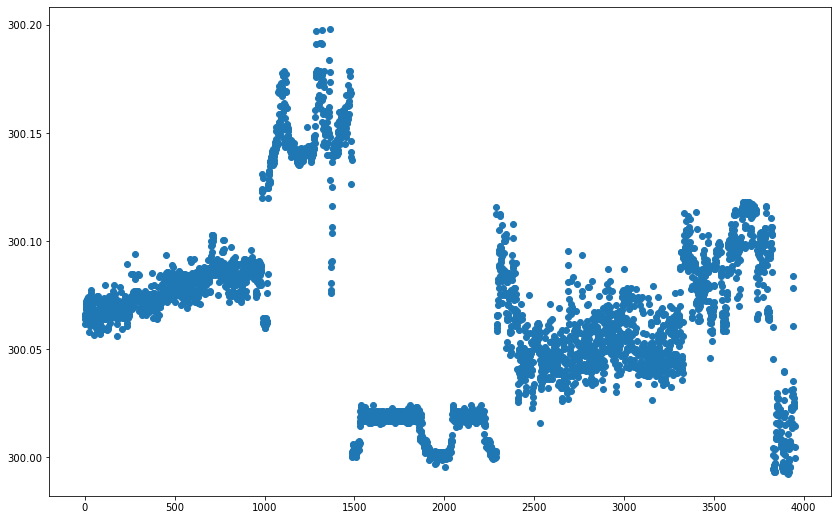

In [62]:
plt.figure(figsize=(14,9))
plt.scatter(np.arange(len(df_x_ffill_sub)), sub['size1'])
plt.show()

In [64]:
sub.to_csv('mold_stacking_f19_6models_meta_lgb_20201022.csv', index=False)